In [ ]:
# !pip install --user pyhive
# !pip install --user thrift
!pip install --user sasl
# !pip install --user thrift_sasl
# !pip install --user pycats
!pip install seaborn

In [104]:
import sys
import numpy as np
import pandas as pd
import datetime
import os
import glob
import h2o

import pyhive
from pyhive import hive
from datetime import datetime

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import seaborn as sns

import time
import csv

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix ,classification_report,accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import model_selection, metrics   #Additional scklearn functions
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

import warnings
warnings.filterwarnings("ignore")

In [1082]:
#Place of Service Denial bucket
conn = hive.connect(host='dbslp0525.uhc.com',port=10002,auth='LDAP',username=usr,password=pas)
stat = """set mapreduce.job.queuename= araadh_q1.ararest_sq1"""
stat1="""select * from mcr_eni_unlist.pos_bucket_grouped_v2"""
stat1=stat1.replace("\n"," ")
stat1=stat1.replace('\t'," ")
stat1=stat1.replace("   "," ")
cur = conn.cursor()
print(time.time())
cur.execute(stat)
cur.execute(stat1)
print(time.time())
pos_bucket_grouped= pd.DataFrame(cur.fetchall())
pos_bucket_grouped.columns = ['plc_of_srvc','total_claim','apprvd_cases_count','denied_cases_count','prcrnt','pos_denied_prcnt_grp']
print("done")
# Line of business Denial bucket

conn = hive.connect(host='dbslp0525.uhc.com',port=10002,auth='LDAP',username=usr,password=pas)
stat = """set mapreduce.job.queuename= araadh_q1.ararest_sq1"""
stat1="""select * from mcr_eni_unlist.lob_bucket_grouped"""
stat1=stat1.replace("\n"," ")
stat1=stat1.replace('\t'," ")
stat1=stat1.replace("   "," ")
cur = conn.cursor()
print(time.time())
cur.execute(stat)
cur.execute(stat1)
print(time.time())
lob_bucket_grouped= pd.DataFrame(cur.fetchall())
lob_bucket_grouped.columns = ['lob','total_claim','apprvd_cases_count','denied_cases_count','prcrnt','lob_denied_prcnt_grp']
print("done")

conn = hive.connect(host='dbslp0525.uhc.com',port=10002,auth='LDAP',username=usr,password=pas)
stat = """set mapreduce.job.queuename= araadh_q1.ararest_sq1"""
stat1="""select * from mcr_eni_unlist.collect_set_bucket_grouped"""
stat1=stat1.replace("\n"," ")
stat1=stat1.replace('\t'," ")
stat1=stat1.replace("   "," ")
cur = conn.cursor()
print(time.time())
cur.execute(stat)
cur.execute(stat1)
print(time.time())
collect_set_bucket_grouped= pd.DataFrame(cur.fetchall())
collect_set_bucket_grouped.columns = ['category_set','total_claim','apprvd_cases_count','denied_cases_count','prcrnt','collect_set_denied_prcnt_grp']
print("done")

conn = hive.connect(host='dbslp0525.uhc.com',port=10002,auth='LDAP',username=usr,password=pas)
stat = """set mapreduce.job.queuename= araadh_q1.ararest_sq1"""
stat1="""select * from mcr_eni_unlist.cpt_bucket_grouped"""
stat1=stat1.replace("\n"," ")
stat1=stat1.replace('\t'," ")
stat1=stat1.replace("   "," ")
cur = conn.cursor()
print(time.time())
cur.execute(stat)
cur.execute(stat1)
print(time.time())
cpt_bucket_grouped= pd.DataFrame(cur.fetchall())
cpt_bucket_grouped.columns = ['proc_cd_gal','total_services','apprvd_cases_count','denied_cases_count','prcrnt','cpt_denied_prcnt_grp']
print("done")

conn = hive.connect(host='dbslp0525.uhc.com',port=10002,auth='LDAP',username=usr,password=pas)
stat = """set mapreduce.job.queuename= araadh_q1.ararest_sq1"""
stat1="""select * from mcr_eni_unlist.tin_bucket_grouped"""
stat1=stat1.replace("\n"," ")
stat1=stat1.replace('\t'," ")
stat1=stat1.replace("   "," ")
cur = conn.cursor()
print(time.time())
cur.execute(stat)
cur.execute(stat1)
print(time.time())
tin_bucket_grouped= pd.DataFrame(cur.fetchall())
tin_bucket_grouped.columns = ['prov_tin','total_claim','apprvd_cases_count','denied_cases_count','prcrnt','tin_denied_prcnt_grp']
print("done")

conn = hive.connect(host='dbslp0525.uhc.com',port=10002,auth='LDAP',username=usr,password=pas)
stat = """set mapreduce.job.queuename= araadh_q1.ararest_sq1"""
stat1="""select * from mcr_eni_unlist.state_bucket_grouped"""
stat1=stat1.replace("\n"," ")
stat1=stat1.replace('\t'," ")
stat1=stat1.replace("   "," ")
cur = conn.cursor()
print(time.time())
cur.execute(stat)
cur.execute(stat1)
print(time.time())
state_bucket_grouped= pd.DataFrame(cur.fetchall())
state_bucket_grouped.columns = ['st_abbr_cd','total_claim','apprvd_cases_count','denied_cases_count','prcrnt','state_denied_prcnt_grp']
print("done")

conn = hive.connect(host='dbslp0525.uhc.com',port=10002,auth='LDAP',username=usr,password=pas)
stat = """set mapreduce.job.queuename= araadh_q1.ararest_sq1"""
stat1="""select * from mcr_eni_unlist.diagnosis_bucket_grouped"""
stat1=stat1.replace("\n"," ")
stat1=stat1.replace('\t'," ")
stat1=stat1.replace("   "," ")
cur = conn.cursor()
print(time.time())
cur.execute(stat)
cur.execute(stat1)
print(time.time())
diagnosis_bucket_grouped= pd.DataFrame(cur.fetchall())
diagnosis_bucket_grouped.columns = ['diag_3','total_claim','apprvd_cases_count','denied_cases_count','prcrnt','diag_denied_prcnt_grp']
print("done")

conn = hive.connect(host='dbslp0525.uhc.com',port=10002,auth='LDAP',username=usr,password=pas)
stat = """set mapreduce.job.queuename= araadh_q1.ararest_sq1"""
stat1="""select * from mcr_eni_unlist.npi_bucket_grouped"""
stat1=stat1.replace("\n"," ")
stat1=stat1.replace('\t'," ")
stat1=stat1.replace("   "," ")
cur = conn.cursor()
print(time.time())
cur.execute(stat)
cur.execute(stat1)
print(time.time())
npi_bucket_grouped= pd.DataFrame(cur.fetchall())
npi_bucket_grouped.columns = ['npi','total_claim','apprvd_cases_count','denied_cases_count','prcrnt','npi_denied_prcnt_grp']
print("done")

conn = hive.connect(host='dbslp0525.uhc.com',port=10002,auth='LDAP',username=usr,password=pas)
stat = """set mapreduce.job.queuename= araadh_q1.ararest_sq1"""
stat1="""select * from mcr_eni_unlist.month_bucket_grouped"""
stat1=stat1.replace("\n"," ")
stat1=stat1.replace('\t'," ")
stat1=stat1.replace("   "," ")
cur = conn.cursor()
print(time.time())
cur.execute(stat)
cur.execute(stat1)
print(time.time())
month_bucket_grouped= pd.DataFrame(cur.fetchall())
month_bucket_grouped.columns = ['bil_recv_month','total_claim','apprvd_cases_count','denied_cases_count','prcrnt','month_denied_prcnt_grp']
print("done")

NameError: name 'usr' is not defined

In [ ]:
pos_bucket_grouped.to_pickle('/mapr/datalake/uhc/ei/pi_ara/beta/projects/G12/MCR_EnI/pickle_files/pos_bucket_grouped.pkl')
lob_bucket_grouped.to_pickle('/mapr/datalake/uhc/ei/pi_ara/beta/projects/G12/MCR_EnI/pickle_files/lob_bucket_grouped.pkl')
collect_set_bucket_grouped.to_pickle('/mapr/datalake/uhc/ei/pi_ara/beta/projects/G12/MCR_EnI/pickle_files/collect_set_bucket_grouped.pkl')
cpt_bucket_grouped.to_pickle('/mapr/datalake/uhc/ei/pi_ara/beta/projects/G12/MCR_EnI/pickle_files/cpt_bucket_grouped.pkl')
policy_bucket_grouped.to_pickle('/mapr/datalake/uhc/ei/pi_ara/beta/projects/G12/MCR_EnI/pickle_files/policy_bucket_grouped.pkl')
tin_bucket_grouped.to_pickle('/mapr/datalake/uhc/ei/pi_ara/beta/projects/G12/MCR_EnI/pickle_files/tin_bucket_grouped.pkl')
state_bucket_grouped.to_pickle('/mapr/datalake/uhc/ei/pi_ara/beta/projects/G12/MCR_EnI/pickle_files/state_bucket_grouped.pkl')
diagnosis_bucket_grouped.to_pickle('/mapr/datalake/uhc/ei/pi_ara/beta/projects/G12/MCR_EnI/pickle_files/diagnosis_bucket_grouped.pkl')
npi_bucket_grouped.to_pickle('/mapr/datalake/uhc/ei/pi_ara/beta/projects/G12/MCR_EnI/pickle_files/npi_bucket_grouped.pkl')
month_bucket_grouped.to_pickle('/mapr/datalake/uhc/ei/pi_ara/beta/projects/G12/MCR_EnI/pickle_files/month_bucket_grouped.pkl')

In [ ]:
conn = hive.connect(host='dbslp0525.uhc.com',port=10002,auth='LDAP',username=usr,password=pas)
stat = """set mapreduce.job.queuename= araadh_q1.ararest_sq1"""
stat1="""select * from mcr_eni_unlist.inscope_inclu_train"""
stat1=stat1.replace("\n"," ")
stat1=stat1.replace('\t'," ")
stat1=stat1.replace("   "," ")
cur = conn.cursor()
print(time.time())
cur.execute(stat)
cur.execute(stat1)
print(time.time())
inscope_inclu_train= pd.DataFrame(cur.fetchall())
inscope_inclu_train.columns = ['key','icn','bil_recv_dt','policy','report_date','ufe_claim_id','fst_srvc_dt','proc_cd_gal','prov_tin','lin_chrg_amt','bth_dt','st_abbr_cd','diag_cd','npi','clm_tot_chrg_amt','dmg_pat_sex','lob','units','plc_of_srvc','proc_sub_cat','unlisted_flag','srvc_den_flag','fk_flag','clm_den_flag','clm_tot_chrg_amt_v2','rw_nm','diag_3','category_set','mem_age','listed_presence','unit_agg']
print("done")
inscope_inclu_train.to_pickle('/mapr/datalake/uhc/ei/pi_ara/beta/projects/G12/MCR_EnI/pickle_files/inscope_inclu_train.pkl')

In [ ]:
conn = hive.connect(host='dbslp0525.uhc.com',port=10002,auth='LDAP',username=usr,password=pas)
stat = """set mapreduce.job.queuename= araadh_q1.ararest_sq1"""
stat1="""select * from mcr_eni_unlist.inscope_inclu_oos"""
stat1=stat1.replace("\n"," ")
stat1=stat1.replace('\t'," ")
stat1=stat1.replace("   "," ")
cur = conn.cursor()
print(time.time())
cur.execute(stat)
cur.execute(stat1)
print(time.time())
inscope_inclu_oos= pd.DataFrame(cur.fetchall())
inscope_inclu_oos.columns = ['key','icn','bil_recv_dt','policy','report_date','ufe_claim_id','fst_srvc_dt','proc_cd_gal','prov_tin','lin_chrg_amt','bth_dt','st_abbr_cd','diag_cd','npi','clm_tot_chrg_amt','dmg_pat_sex','lob','units','plc_of_srvc','proc_sub_cat','unlisted_flag','srvc_den_flag','fk_flag','clm_den_flag','clm_tot_chrg_amt_v2','rw_nm','diag_3','category_set','mem_age','listed_presence','unit_agg']
print("done")
inscope_inclu_oos.to_pickle('/mapr/datalake/uhc/ei/pi_ara/beta/projects/G12/MCR_EnI/pickle_files/inscope_inclu_oos.pkl')

In [105]:
inscope_inclu_train = pd.read_pickle('/projects/G12/pickle_data/inscope_inclu_train.pkl')
inscope_inclu_oos = pd.read_pickle('/projects/G12/pickle_data/inscope_inclu_oos.pkl')

pos_bucket_grouped = pd.read_pickle('/projects/G12/pickle_data/pos_bucket_grouped.pkl')
lob_bucket_grouped = pd.read_pickle('/projects/G12/pickle_data/lob_bucket_grouped.pkl')
collect_set_bucket_grouped = pd.read_pickle('/projects/G12/pickle_data/collect_set_bucket_grouped.pkl')
cpt_bucket_grouped = pd.read_pickle('/projects/G12/pickle_data/cpt_bucket_grouped.pkl')
policy_bucket_grouped = pd.read_pickle('/projects/G12/pickle_data/policy_bucket_grouped.pkl')
tin_bucket_grouped = pd.read_pickle('/projects/G12/pickle_data/tin_bucket_grouped.pkl')
state_bucket_grouped = pd.read_pickle('/projects/G12/pickle_data/state_bucket_grouped.pkl')
diagnosis_bucket_grouped = pd.read_pickle('/projects/G12/pickle_data/diagnosis_bucket_grouped.pkl')
npi_bucket_grouped = pd.read_pickle('/projects/G12/pickle_data/npi_bucket_grouped.pkl')
month_bucket_grouped = pd.read_pickle('/projects/G12/pickle_data/month_bucket_grouped.pkl')

In [106]:
inscope_inclu_train = pd.read_pickle('/projects/G12/pickle_data/inscope_inclu_train.pkl')
inscope_inclu_oos = pd.read_pickle('/projects/G12/pickle_data/inscope_inclu_oos.pkl')

pos_bucket_grouped_v2 = pd.read_pickle('/projects/G12/pickle_data/pos_bucket_grouped_v2.pkl')
lob_bucket_grouped_v2 = pd.read_pickle('/projects/G12/pickle_data/lob_bucket_grouped_v2.pkl')
collect_set_bucket_grouped_v2 = pd.read_pickle('/projects/G12/pickle_data/collect_set_bucket_grouped_v2.pkl')
cpt_bucket_grouped_v2 = pd.read_pickle('/projects/G12/pickle_data/cpt_bucket_grouped_v2.pkl')
policy_bucket_grouped_v2 = pd.read_pickle('/projects/G12/pickle_data/policy_bucket_grouped_v2.pkl')
tin_bucket_grouped_v2 = pd.read_pickle('/projects/G12/pickle_data/tin_bucket_grouped_v2.pkl')
state_bucket_grouped_v2 = pd.read_pickle('/projects/G12/pickle_data/state_bucket_grouped_v2.pkl')
diagnosis_bucket_grouped_v2 = pd.read_pickle('/projects/G12/pickle_data/diagnosis_bucket_grouped_v2.pkl')
npi_bucket_grouped_v2 = pd.read_pickle('/projects/G12/pickle_data/npi_bucket_grouped_v2.pkl')


In [107]:
train = inscope_inclu_train.drop_duplicates()


In [108]:
test = inscope_inclu_oos.drop_duplicates()

In [109]:
df_obj = train.select_dtypes(['object'])
train[df_obj.columns] = df_obj.apply(lambda x: x.str.strip().str.upper()).replace('', np.nan)


In [110]:
df_obj = test.select_dtypes(['object'])
test[df_obj.columns] = df_obj.apply(lambda x: x.str.strip().str.upper()).replace('', np.nan)


In [111]:
cols_cat = train.select_dtypes(['object']).columns
cols_cont = train.select_dtypes(['float','int']).columns

train[cols_cat]=train[cols_cat].fillna(train[cols_cat].mode().iloc[0])
train[cols_cont]=train[cols_cont].fillna(train[cols_cont].median())

In [112]:
cols_cat = test.select_dtypes(['object']).columns
cols_cont = test.select_dtypes(['float','int']).columns

test[cols_cat]=test[cols_cat].fillna(train[cols_cat].mode().iloc[0])
test[cols_cont]=test[cols_cont].fillna(train[cols_cont].median())

In [113]:
train['lin_chrg_amt_norm']=(train['lin_chrg_amt']-train['lin_chrg_amt'].min())/(train['lin_chrg_amt'].max()-train['lin_chrg_amt'].min())
train['clm_tot_chrg_amt_v2_norm']=(train['clm_tot_chrg_amt_v2']-train['clm_tot_chrg_amt_v2'].min())/(train['clm_tot_chrg_amt_v2'].max()-train['clm_tot_chrg_amt_v2'].min())

In [114]:
test['lin_chrg_amt_norm']=(test['lin_chrg_amt']-train['lin_chrg_amt'].min())/(train['lin_chrg_amt'].max()-train['lin_chrg_amt'].min())
test['clm_tot_chrg_amt_v2_norm']=(test['clm_tot_chrg_amt_v2']-train['clm_tot_chrg_amt_v2'].min())/(train['clm_tot_chrg_amt_v2'].max()-train['clm_tot_chrg_amt_v2'].min())

In [115]:
train['lin_chrg_amt_norm_log'] = np.log(train['lin_chrg_amt_norm']+1)
train['clm_tot_chrg_amt_v2_norm_log'] = np.log(train['clm_tot_chrg_amt_v2_norm']+1)

In [117]:
test['lin_chrg_amt_norm_log'] = np.log(test['lin_chrg_amt_norm']+1)
test['clm_tot_chrg_amt_v2_norm_log'] = np.log(test['clm_tot_chrg_amt_v2_norm']+1)

In [116]:
bin1 = [train['mem_age'].min()-1,20,45,60,train['mem_age'].max()+1]
train['mem_age_bin'] = pd.cut(train['mem_age'], bin1)

In [118]:
bin1 = [train['mem_age'].min()-1,20,45,60,train['mem_age'].max()+1]
test['mem_age_bin'] = pd.cut(test['mem_age'], bin1)

In [119]:
train['dmg_pat_sex']=np.where(train['dmg_pat_sex']=='F',0,1)

In [120]:
test['dmg_pat_sex']=np.where(test['dmg_pat_sex']=='F',0,1)

In [121]:
train['bil_recv_dt']=pd.to_datetime(train['bil_recv_dt'], format = "%Y-%m-%d")
train['bil_recv_month'] = train['bil_recv_dt'].apply(lambda x: x.month)
train['bil_recv_month'] = train['bil_recv_month'].astype(str)
# month_bucket_grouped['bil_recv_month'] = month_bucket_grouped['bil_recv_month'].astype(str)

In [122]:
test['bil_recv_dt']=pd.to_datetime(test['bil_recv_dt'], format = "%Y-%m-%d")
test['bil_recv_month'] = test['bil_recv_dt'].apply(lambda x: x.month)
test['bil_recv_month'] = test['bil_recv_month'].astype(str)
# month_bucket_grouped['bil_recv_month'] = month_bucket_grouped['bil_recv_month'].astype(str)

In [123]:
train['fst_srvc_dt']=pd.to_datetime(train['fst_srvc_dt'], format = "%Y-%m-%d")
data_icn_fst_min=train.groupby(['icn'],as_index=False)['fst_srvc_dt'].min()
data_icn_fst_min['fst_srvc_dt_min']=data_icn_fst_min['fst_srvc_dt']
data_icn_fst_min=data_icn_fst_min.drop(['fst_srvc_dt'],axis=1)
data_icn_fst_max=train.groupby(['icn'],as_index=False)['fst_srvc_dt'].max()
data_icn_fst_max['fst_srvc_dt_max']=data_icn_fst_max['fst_srvc_dt']
data_icn_fst_max=data_icn_fst_max.drop(['fst_srvc_dt'],axis=1)

train=pd.merge(pd.merge(train,data_icn_fst_min,on='icn',how='left'),data_icn_fst_max,on='icn',how='left')

train['bil_diff_fst']=train['bil_recv_dt']-train['fst_srvc_dt_min']
train['fst_max_min']=train['fst_srvc_dt_max']-train['fst_srvc_dt_min']


In [124]:
test['fst_srvc_dt']=pd.to_datetime(test['fst_srvc_dt'], format = "%Y-%m-%d")
data_icn_fst_min=test.groupby(['icn'],as_index=False)['fst_srvc_dt'].min()
data_icn_fst_min['fst_srvc_dt_min']=data_icn_fst_min['fst_srvc_dt']
data_icn_fst_min=data_icn_fst_min.drop(['fst_srvc_dt'],axis=1)
data_icn_fst_max=test.groupby(['icn'],as_index=False)['fst_srvc_dt'].max()
data_icn_fst_max['fst_srvc_dt_max']=data_icn_fst_max['fst_srvc_dt']
data_icn_fst_max=data_icn_fst_max.drop(['fst_srvc_dt'],axis=1)

test=pd.merge(pd.merge(test,data_icn_fst_min,on='icn',how='left'),data_icn_fst_max,on='icn',how='left')

test['bil_diff_fst']=test['bil_recv_dt']-test['fst_srvc_dt_min']
test['fst_max_min']=test['fst_srvc_dt_max']-test['fst_srvc_dt_min']


In [125]:
train['bil_diff_fst']=train['bil_diff_fst'].astype('timedelta64[D]')


In [126]:
test['bil_diff_fst']=test['bil_diff_fst'].astype('timedelta64[D]')


In [127]:
train['fst_max_min']=train['fst_max_min'].astype('timedelta64[D]')


In [128]:
test['fst_max_min']=test['fst_max_min'].astype('timedelta64[D]')


In [129]:
train['bil_diff_fst_norm']=(train['bil_diff_fst']-train['bil_diff_fst'].min())/(train['bil_diff_fst'].max()-train['bil_diff_fst'].min())
train['fst_max_min_norm']=(train['fst_max_min']-train['fst_max_min'].min())/(train['fst_max_min'].max()-train['fst_max_min'].min())

In [130]:
test['bil_diff_fst_norm']=(test['bil_diff_fst']-train['bil_diff_fst'].min())/(train['bil_diff_fst'].max()-train['bil_diff_fst'].min())
test['fst_max_min_norm']=(test['fst_max_min']-train['fst_max_min'].min())/(train['fst_max_min'].max()-train['fst_max_min'].min())

In [131]:
train['bil_diff_fst_norm_log'] = np.log(train['bil_diff_fst_norm']+1)
train['fst_max_min_norm_log'] = np.log(train['fst_max_min_norm']+1)

In [132]:
test['bil_diff_fst_norm_log'] = np.log(test['bil_diff_fst_norm']+1)
test['fst_max_min_norm_log'] = np.log(test['fst_max_min_norm']+1)

In [133]:
train.head()

,key,icn,bil_recv_dt,policy,report_date,ufe_claim_id,fst_srvc_dt,proc_cd_gal,prov_tin,lin_chrg_amt,...,mem_age_bin,bil_recv_month,fst_srvc_dt_min,fst_srvc_dt_max,bil_diff_fst,fst_max_min,bil_diff_fst_norm,fst_max_min_norm,bil_diff_fst_norm_log,fst_max_min_norm_log
0,3340484014-28289-2018-03-30-1531.85,3340484014,2018-04-02,912796,2018-04-03,994180921159100,2018-03-30,28289,561079264,1531.85,...,"(45.0, 60.0]",4,2018-03-30,2018-03-30,3.0,0.0,0.019038,0.0,0.018859,0.0
1,3340484014-28899-2018-03-30-2779.0,3340484014,2018-04-02,912796,2018-04-03,994180921159100,2018-03-30,28899,561079264,2779.00,...,"(45.0, 60.0]",4,2018-03-30,2018-03-30,3.0,0.0,0.019038,0.0,0.018859,0.0
2,3340992779-43774-2018-03-27-2992.0,3340992779,2018-04-02,717473,2018-04-03,994180922143200,2018-03-27,43774,593366100,2992.00,...,"(45.0, 60.0]",4,2018-03-27,2018-03-27,6.0,0.0,0.022044,0.0,0.021805,0.0
3,3340992779-47379-2018-03-27-2603.0,3340992779,2018-04-02,717473,2018-04-03,994180922143200,2018-03-27,47379,593366100,2603.00,...,"(45.0, 60.0]",4,2018-03-27,2018-03-27,6.0,0.0,0.022044,0.0,0.021805,0.0
4,3341042986-43235-2018-01-10-750.0,3341042986,2018-04-04,907816,2018-04-05,994180941039400,2018-01-10,43235,760204325,750.00,...,"(20.0, 45.0]",4,2018-01-10,2018-01-10,84.0,0.0,0.100200,0.0,0.095492,0.0


In [134]:
test.head()

,key,icn,bil_recv_dt,policy,report_date,ufe_claim_id,fst_srvc_dt,proc_cd_gal,prov_tin,lin_chrg_amt,...,mem_age_bin,bil_recv_month,fst_srvc_dt_min,fst_srvc_dt_max,bil_diff_fst,fst_max_min,bil_diff_fst_norm,fst_max_min_norm,bil_diff_fst_norm_log,fst_max_min_norm_log
0,7576799270-95870-2018-07-09-7956.0,7576799270,2018-12-27,729433,2019-04-01,910183615240300,2018-07-09,95870,821548769,7956.0,...,"(45.0, 60.0]",12,2018-07-09,2018-07-09,171.0,0.0,0.187375,0.0,0.171745,0.0
1,7576799270-95938-2018-07-09-4501.0,7576799270,2018-12-27,729433,2019-04-01,910183615240300,2018-07-09,95938,821548769,4501.0,...,"(45.0, 60.0]",12,2018-07-09,2018-07-09,171.0,0.0,0.187375,0.0,0.171745,0.0
2,7576799270-95955-2018-07-09-7500.0,7576799270,2018-12-27,729433,2019-04-01,910183615240300,2018-07-09,95955,821548769,7500.0,...,"(45.0, 60.0]",12,2018-07-09,2018-07-09,171.0,0.0,0.187375,0.0,0.171745,0.0
3,7576799270-95999-2018-07-09-7500.0,7576799270,2018-12-27,729433,2019-04-01,910183615240300,2018-07-09,95999,821548769,7500.0,...,"(45.0, 60.0]",12,2018-07-09,2018-07-09,171.0,0.0,0.187375,0.0,0.171745,0.0
4,7576799270-G0453-2018-07-09-30000.0,7576799270,2018-12-27,729433,2019-04-01,910183615240300,2018-07-09,G0453,821548769,30000.0,...,"(45.0, 60.0]",12,2018-07-09,2018-07-09,171.0,0.0,0.187375,0.0,0.171745,0.0


In [135]:
diag_average=train.groupby(['diag_cd'],as_index=False)['clm_tot_chrg_amt_v2_norm_log'].mean()
diag_average['diag_amnt_avg']=diag_average['clm_tot_chrg_amt_v2_norm_log']
diag_average=diag_average.drop(['clm_tot_chrg_amt_v2_norm_log'],axis=1)
diag_average.head()

tin_diag_average=train.groupby(['prov_tin','diag_cd'],as_index=False)['clm_tot_chrg_amt_v2_norm_log'].mean()
tin_diag_average['tin_diag_amnt_avg']=tin_diag_average['clm_tot_chrg_amt_v2_norm_log']
tin_diag_average=tin_diag_average.drop(['clm_tot_chrg_amt_v2_norm_log'],axis=1)

npi_diag_average=train.groupby(['npi','diag_cd'],as_index=False)['clm_tot_chrg_amt_v2_norm_log'].mean()
npi_diag_average['npi_diag_amnt_avg']=npi_diag_average['clm_tot_chrg_amt_v2_norm_log']
npi_diag_average=npi_diag_average.drop(['clm_tot_chrg_amt_v2_norm_log'],axis=1)


train=pd.merge(pd.merge(pd.merge(train,diag_average,on='diag_cd',how='left'),tin_diag_average,on=['prov_tin','diag_cd'],how='left'),
               npi_diag_average,on=['npi','diag_cd'],how='left')
               


In [136]:
diag_average=test.groupby(['diag_cd'],as_index=False)['clm_tot_chrg_amt_v2_norm_log'].mean()
diag_average['diag_amnt_avg']=diag_average['clm_tot_chrg_amt_v2_norm_log']
diag_average=diag_average.drop(['clm_tot_chrg_amt_v2_norm_log'],axis=1)
diag_average.head()

tin_diag_average=test.groupby(['prov_tin','diag_cd'],as_index=False)['clm_tot_chrg_amt_v2_norm_log'].mean()
tin_diag_average['tin_diag_amnt_avg']=tin_diag_average['clm_tot_chrg_amt_v2_norm_log']
tin_diag_average=tin_diag_average.drop(['clm_tot_chrg_amt_v2_norm_log'],axis=1)

npi_diag_average=test.groupby(['npi','diag_cd'],as_index=False)['clm_tot_chrg_amt_v2_norm_log'].mean()
npi_diag_average['npi_diag_amnt_avg']=npi_diag_average['clm_tot_chrg_amt_v2_norm_log']
npi_diag_average=npi_diag_average.drop(['clm_tot_chrg_amt_v2_norm_log'],axis=1)


test=pd.merge(pd.merge(pd.merge(test,diag_average,on='diag_cd',how='left'),tin_diag_average,on=['prov_tin','diag_cd'],how='left'),
               npi_diag_average,on=['npi','diag_cd'],how='left')
               


In [137]:
train.head()

,key,icn,bil_recv_dt,policy,report_date,ufe_claim_id,fst_srvc_dt,proc_cd_gal,prov_tin,lin_chrg_amt,...,fst_srvc_dt_max,bil_diff_fst,fst_max_min,bil_diff_fst_norm,fst_max_min_norm,bil_diff_fst_norm_log,fst_max_min_norm_log,diag_amnt_avg,tin_diag_amnt_avg,npi_diag_amnt_avg
0,3340484014-28289-2018-03-30-1531.85,3340484014,2018-04-02,912796,2018-04-03,994180921159100,2018-03-30,28289,561079264,1531.85,...,2018-03-30,3.0,0.0,0.019038,0.0,0.018859,0.0,0.014894,0.009718,0.009718
1,3340484014-28899-2018-03-30-2779.0,3340484014,2018-04-02,912796,2018-04-03,994180921159100,2018-03-30,28899,561079264,2779.00,...,2018-03-30,3.0,0.0,0.019038,0.0,0.018859,0.0,0.014894,0.009718,0.009718
2,3340992779-43774-2018-03-27-2992.0,3340992779,2018-04-02,717473,2018-04-03,994180922143200,2018-03-27,43774,593366100,2992.00,...,2018-03-27,6.0,0.0,0.022044,0.0,0.021805,0.0,0.028265,0.012722,0.012722
3,3340992779-47379-2018-03-27-2603.0,3340992779,2018-04-02,717473,2018-04-03,994180922143200,2018-03-27,47379,593366100,2603.00,...,2018-03-27,6.0,0.0,0.022044,0.0,0.021805,0.0,0.028265,0.012722,0.012722
4,3341042986-43235-2018-01-10-750.0,3341042986,2018-04-04,907816,2018-04-05,994180941039400,2018-01-10,43235,760204325,750.00,...,2018-01-10,84.0,0.0,0.100200,0.0,0.095492,0.0,0.025261,0.040946,0.040946


In [138]:
test.head()

,key,icn,bil_recv_dt,policy,report_date,ufe_claim_id,fst_srvc_dt,proc_cd_gal,prov_tin,lin_chrg_amt,...,fst_srvc_dt_max,bil_diff_fst,fst_max_min,bil_diff_fst_norm,fst_max_min_norm,bil_diff_fst_norm_log,fst_max_min_norm_log,diag_amnt_avg,tin_diag_amnt_avg,npi_diag_amnt_avg
0,7576799270-95870-2018-07-09-7956.0,7576799270,2018-12-27,729433,2019-04-01,910183615240300,2018-07-09,95870,821548769,7956.0,...,2018-07-09,171.0,0.0,0.187375,0.0,0.171745,0.0,0.106392,0.12707,0.12707
1,7576799270-95938-2018-07-09-4501.0,7576799270,2018-12-27,729433,2019-04-01,910183615240300,2018-07-09,95938,821548769,4501.0,...,2018-07-09,171.0,0.0,0.187375,0.0,0.171745,0.0,0.106392,0.12707,0.12707
2,7576799270-95955-2018-07-09-7500.0,7576799270,2018-12-27,729433,2019-04-01,910183615240300,2018-07-09,95955,821548769,7500.0,...,2018-07-09,171.0,0.0,0.187375,0.0,0.171745,0.0,0.106392,0.12707,0.12707
3,7576799270-95999-2018-07-09-7500.0,7576799270,2018-12-27,729433,2019-04-01,910183615240300,2018-07-09,95999,821548769,7500.0,...,2018-07-09,171.0,0.0,0.187375,0.0,0.171745,0.0,0.106392,0.12707,0.12707
4,7576799270-G0453-2018-07-09-30000.0,7576799270,2018-12-27,729433,2019-04-01,910183615240300,2018-07-09,G0453,821548769,30000.0,...,2018-07-09,171.0,0.0,0.187375,0.0,0.171745,0.0,0.106392,0.12707,0.12707


In [139]:
# Indicators

amt_indicator=['diag_amnt_avg','tin_diag_amnt_avg','npi_diag_amnt_avg']
for i in amt_indicator:
    train[i+'_ind_above']=np.where(train['clm_tot_chrg_amt_v2_norm_log']> train[i],1,0)


In [141]:
# Indicators

amt_indicator=['diag_amnt_avg','tin_diag_amnt_avg','npi_diag_amnt_avg']
for i in amt_indicator:
    test[i+'_ind_above']=np.where(test['clm_tot_chrg_amt_v2_norm_log']> test[i],1,0)


In [142]:

train['uni_agg_norm']=(train['unit_agg']-train['unit_agg'].min())/(train['unit_agg'].max()-train['unit_agg'].min())
train['unit_agg_norm_log'] = np.log(train['uni_agg_norm']+1)

In [143]:

test['uni_agg_norm']=(test['unit_agg']-train['unit_agg'].min())/(train['unit_agg'].max()-train['unit_agg'].min())
test['unit_agg_norm_log'] = np.log(test['uni_agg_norm']+1)

In [144]:
train_den = train[train['clm_den_flag'] == 1]


## 1.Provider State category

train_den_state=train_den.groupby('st_abbr_cd',as_index=False).agg({"icn":"count"})
df_2 = train_den_state.sort_values(by="icn",axis=0,ascending=False)
df_2 = df_2.reset_index(drop=True)
df_2["cum_sum"] = df_2.icn.cumsum()
df_2["cum_per"] = 100*df_2.cum_sum/df_2.icn.sum()
df_2[df_2["cum_per"]<=80]["st_abbr_cd"]
name2= df_2[df_2["cum_per"]<=80]["st_abbr_cd"]
name2

train['st_abbr_cd_bin'] = train.st_abbr_cd.where(train.st_abbr_cd.isin(name2), 'others')
print (len(train['st_abbr_cd'].unique()))
print (train['st_abbr_cd_bin'].unique())


## 2.Place of service

train_den_pos=train_den.groupby('plc_of_srvc',as_index=False).agg({"icn":"count"})
df_3 = train_den_pos.sort_values(by="icn",axis=0,ascending=False)
df_3 = df_3.reset_index(drop=True)
df_3["cum_sum"] = df_3.icn.cumsum()
df_3["cum_per"] = 100*df_3.cum_sum/df_3.icn.sum()
df_3[df_3["cum_per"]<=80]["plc_of_srvc"]
name3= df_3[df_3["cum_per"]<=80]["plc_of_srvc"]
name3

train['plc_of_srvc_bin'] = train.plc_of_srvc.where(train.plc_of_srvc.isin(name3), 'others')
print (len(train['plc_of_srvc'].unique()))
print (train['plc_of_srvc_bin'].unique())


### 3.Service billed bin

bin1 = [train['bil_diff_fst'].min()-1,90,180,train['bil_diff_fst'].max()+1]
train['bil_diff_fst_bin'] = pd.cut(train['bil_diff_fst'], bin1)


54
['others' 'TX' 'OK' 'NY' 'CA' 'IL' 'WI' 'NJ' 'OH' 'AZ']
31
['22' '21' 'others' '11' '15']


In [145]:
#train_den = train[train['clm_den_flag'] == 1]


# ## 1.Provider State category

# train_den_state=train_den.groupby('st_abbr_cd',as_index=False).agg({"icn":"count"})
# df_2 = train_den_state.sort_values(by="icn",axis=0,ascending=False)
# df_2 = df_2.reset_index(drop=True)
# df_2["cum_sum"] = df_2.icn.cumsum()
# df_2["cum_per"] = 100*df_2.cum_sum/df_2.icn.sum()
# df_2[df_2["cum_per"]<=80]["st_abbr_cd"]
# name2= df_2[df_2["cum_per"]<=80]["st_abbr_cd"]
# name2

test['st_abbr_cd_bin'] = test.st_abbr_cd.where(test.st_abbr_cd.isin(name2), 'others')
print (len(test['st_abbr_cd'].unique()))
print (test['st_abbr_cd_bin'].unique())


## 2.Place of service

# train_den_pos=train_den.groupby('plc_of_srvc',as_index=False).agg({"icn":"count"})
# df_3 = train_den_pos.sort_values(by="icn",axis=0,ascending=False)
# df_3 = df_3.reset_index(drop=True)
# df_3["cum_sum"] = df_3.icn.cumsum()
# df_3["cum_per"] = 100*df_3.cum_sum/df_3.icn.sum()
# df_3[df_3["cum_per"]<=80]["plc_of_srvc"]
# name3= df_3[df_3["cum_per"]<=80]["plc_of_srvc"]
# name3

test['plc_of_srvc_bin'] = test.plc_of_srvc.where(test.plc_of_srvc.isin(name3), 'others')
print (len(test['plc_of_srvc'].unique()))
print (test['plc_of_srvc_bin'].unique())


### 3.Service billed bin

bin1 = [train['bil_diff_fst'].min()-1,90,180,train['bil_diff_fst'].max()+1]
test['bil_diff_fst_bin'] = pd.cut(test['bil_diff_fst'], bin1)


51
['CA' 'NY' 'NJ' 'others' 'AZ' 'TX' 'IL' 'OH' 'WI' 'OK']
27
['21' 'others' '11' '15' '22']


In [148]:
# version 2 binning
train_buck = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(train, pos_bucket_grouped_v2[['plc_of_srvc','pos_denied_prcnt_grp']], on='plc_of_srvc', how='left'), lob_bucket_grouped_v2[['lob','lob_denied_prcnt_grp']], on='lob', how='left'), collect_set_bucket_grouped_v2[['category_set','collect_set_denied_prcnt_grp']], on='category_set', how='left'), cpt_bucket_grouped_v2[['proc_cd_gal','cpt_denied_prcnt_grp']], on='proc_cd_gal', how='left'), tin_bucket_grouped_v2[['prov_tin','tin_denied_prcnt_grp']], on='prov_tin', how='left'), state_bucket_grouped_v2[['st_abbr_cd','state_denied_prcnt_grp']], on='st_abbr_cd', how='left'), diagnosis_bucket_grouped_v2[['diag_3','diag_denied_prcnt_grp']], on='diag_3', how='left'), npi_bucket_grouped_v2[['npi','npi_denied_prcnt_grp']], on='npi', how='left'), policy_bucket_grouped_v2[['policy','policy_denied_prcnt_grp']], on='policy', how='left')

In [149]:
# version 2 binning
test_buck = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(test, pos_bucket_grouped_v2[['plc_of_srvc','pos_denied_prcnt_grp']], on='plc_of_srvc', how='left'), lob_bucket_grouped_v2[['lob','lob_denied_prcnt_grp']], on='lob', how='left'), collect_set_bucket_grouped_v2[['category_set','collect_set_denied_prcnt_grp']], on='category_set', how='left'), cpt_bucket_grouped_v2[['proc_cd_gal','cpt_denied_prcnt_grp']], on='proc_cd_gal', how='left'), tin_bucket_grouped_v2[['prov_tin','tin_denied_prcnt_grp']], on='prov_tin', how='left'), state_bucket_grouped_v2[['st_abbr_cd','state_denied_prcnt_grp']], on='st_abbr_cd', how='left'), diagnosis_bucket_grouped_v2[['diag_3','diag_denied_prcnt_grp']], on='diag_3', how='left'), npi_bucket_grouped_v2[['npi','npi_denied_prcnt_grp']], on='npi', how='left'), policy_bucket_grouped_v2[['policy','policy_denied_prcnt_grp']], on='policy', how='left')

In [26]:
#train_buck = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(train, pos_bucket_grouped[['plc_of_srvc','pos_denied_prcnt_grp']], on='plc_of_srvc', how='left'), lob_bucket_grouped[['lob','lob_denied_prcnt_grp']], on='lob', how='left'), collect_set_bucket_grouped[['category_set','collect_set_denied_prcnt_grp']], on='category_set', how='left'), cpt_bucket_grouped[['proc_cd_gal','cpt_denied_prcnt_grp']], on='proc_cd_gal', how='left'), tin_bucket_grouped[['prov_tin','tin_denied_prcnt_grp']], on='prov_tin', how='left'), state_bucket_grouped[['st_abbr_cd','state_denied_prcnt_grp']], on='st_abbr_cd', how='left'), diagnosis_bucket_grouped[['diag_3','diag_denied_prcnt_grp']], on='diag_3', how='left'), npi_bucket_grouped[['npi','npi_denied_prcnt_grp']], on='npi', how='left'), policy_bucket_grouped[['policy','policy_denied_prcnt_grp']], on='policy', how='left')

In [150]:
train_buck.pos_denied_prcnt_grp.value_counts()

G15-45         99909
G70-100         9938
G0-15           1140
G45-70           847
Others_Low       363
Others_High        3
Name: pos_denied_prcnt_grp, dtype: int64

In [173]:
cols = ['pos_denied_prcnt_grp', 'lob_denied_prcnt_grp', 'collect_set_denied_prcnt_grp', 'cpt_denied_prcnt_grp',
       'tin_denied_prcnt_grp', 'state_denied_prcnt_grp', 'diag_denied_prcnt_grp', 'npi_denied_prcnt_grp',
       'policy_denied_prcnt_grp']

train_buck[cols]=train_buck[cols].replace({'Others_Low':'Others'})
train_buck[cols]=train_buck[cols].replace({'Others_High':'Others'})
train_buck[cols]=train_buck[cols].fillna('Others')



In [174]:
cols = ['pos_denied_prcnt_grp', 'lob_denied_prcnt_grp', 'collect_set_denied_prcnt_grp', 'cpt_denied_prcnt_grp',
       'tin_denied_prcnt_grp', 'state_denied_prcnt_grp', 'diag_denied_prcnt_grp', 'npi_denied_prcnt_grp',
       'policy_denied_prcnt_grp']

test_buck[cols]=test_buck[cols].replace({'Others_Low':'Others'})
test_buck[cols]=test_buck[cols].replace({'Others_High':'Others'})
test_buck[cols]=test_buck[cols].fillna('Others')

In [177]:
print(train_buck['icn'].nunique())
print(train_buck.shape)

37452
(112200, 65)


In [178]:
print(test_buck['icn'].nunique())
print(test_buck.shape)

7918
(22853, 65)


In [179]:
train_buck.columns

Index(['key', 'icn', 'bil_recv_dt', 'policy', 'report_date', 'ufe_claim_id',
       'fst_srvc_dt', 'proc_cd_gal', 'prov_tin', 'lin_chrg_amt', 'bth_dt',
       'st_abbr_cd', 'diag_cd', 'npi', 'clm_tot_chrg_amt', 'dmg_pat_sex',
       'lob', 'units', 'plc_of_srvc', 'proc_sub_cat', 'unlisted_flag',
       'srvc_den_flag', 'fk_flag', 'clm_den_flag', 'clm_tot_chrg_amt_v2',
       'rw_nm', 'diag_3', 'category_set', 'mem_age', 'listed_presence',
       'unit_agg', 'lin_chrg_amt_norm', 'clm_tot_chrg_amt_v2_norm',
       'lin_chrg_amt_norm_log', 'clm_tot_chrg_amt_v2_norm_log', 'mem_age_bin',
       'bil_recv_month', 'fst_srvc_dt_min', 'fst_srvc_dt_max', 'bil_diff_fst',
       'fst_max_min', 'bil_diff_fst_norm', 'fst_max_min_norm',
       'bil_diff_fst_norm_log', 'fst_max_min_norm_log', 'diag_amnt_avg',
       'tin_diag_amnt_avg', 'npi_diag_amnt_avg', 'diag_amnt_avg_ind_above',
       'tin_diag_amnt_avg_ind_above', 'npi_diag_amnt_avg_ind_above',
       'uni_agg_norm', 'unit_agg_norm_log', 'st_ab

In [180]:
train_input = train_buck[['icn', 'dmg_pat_sex', 'clm_den_flag', 'listed_presence', 'mem_age_bin', 'unit_agg_norm_log',
                          'clm_tot_chrg_amt_v2_norm_log','bil_recv_month', 'pos_denied_prcnt_grp', 'lob_denied_prcnt_grp',
                          'collect_set_denied_prcnt_grp', 'cpt_denied_prcnt_grp', 'tin_denied_prcnt_grp', 'state_denied_prcnt_grp',
                          'diag_denied_prcnt_grp', 'npi_denied_prcnt_grp','policy_denied_prcnt_grp','bil_diff_fst_norm_log',
                          'diag_amnt_avg','tin_diag_amnt_avg', 'npi_diag_amnt_avg', 'diag_amnt_avg_ind_above',
                          'tin_diag_amnt_avg_ind_above', 'npi_diag_amnt_avg_ind_above','st_abbr_cd_bin',
                          'plc_of_srvc_bin','bil_diff_fst_bin']]


train_input.drop_duplicates(inplace=True)
train_input['icn'] = train_input['icn'].astype(int)

In [181]:
test_input = test_buck[['icn', 'dmg_pat_sex', 'clm_den_flag', 'listed_presence', 'mem_age_bin', 'unit_agg_norm_log',
                          'clm_tot_chrg_amt_v2_norm_log','bil_recv_month', 'pos_denied_prcnt_grp', 'lob_denied_prcnt_grp',
                          'collect_set_denied_prcnt_grp', 'cpt_denied_prcnt_grp', 'tin_denied_prcnt_grp', 'state_denied_prcnt_grp',
                          'diag_denied_prcnt_grp', 'npi_denied_prcnt_grp','policy_denied_prcnt_grp','bil_diff_fst_norm_log',
                          'diag_amnt_avg','tin_diag_amnt_avg', 'npi_diag_amnt_avg', 'diag_amnt_avg_ind_above',
                          'tin_diag_amnt_avg_ind_above', 'npi_diag_amnt_avg_ind_above','st_abbr_cd_bin',
                          'plc_of_srvc_bin','bil_diff_fst_bin']]


test_input.drop_duplicates(inplace=True)
test_input['icn'] = test_input['icn'].astype(int)

In [182]:
# train_input.shape
train_input.dtypes

icn                                int64
dmg_pat_sex                       object
clm_den_flag                       int64
listed_presence                    int64
mem_age_bin                     category
unit_agg_norm_log                float64
clm_tot_chrg_amt_v2_norm_log     float64
bil_recv_month                    object
pos_denied_prcnt_grp              object
lob_denied_prcnt_grp              object
collect_set_denied_prcnt_grp      object
cpt_denied_prcnt_grp              object
tin_denied_prcnt_grp              object
state_denied_prcnt_grp            object
diag_denied_prcnt_grp             object
npi_denied_prcnt_grp              object
policy_denied_prcnt_grp           object
bil_diff_fst_norm_log            float64
diag_amnt_avg                    float64
tin_diag_amnt_avg                float64
npi_diag_amnt_avg                float64
diag_amnt_avg_ind_above            int64
tin_diag_amnt_avg_ind_above        int64
npi_diag_amnt_avg_ind_above        int64
st_abbr_cd_bin  

In [183]:
train_input_dummy = pd.get_dummies(train_input, drop_first=False)

In [184]:
train_input_dummy.shape

(65562, 105)

In [185]:
test_input_dummy = pd.get_dummies(test_input, drop_first=False)
test_input_dummy.shape

(13431, 103)

In [186]:
train_rollup=train_input_dummy.groupby(['icn', 'clm_den_flag'],as_index=False).max()

In [187]:
train_rollup.shape

(37452, 105)

In [188]:
test_rollup=test_input_dummy.groupby(['icn', 'clm_den_flag'],as_index=False).max()
test_rollup.shape

(7918, 103)

In [192]:
a=list(train_rollup.columns)
b=list(test_rollup.columns)
type(a)

def Diff(li1, li2): 
    return (list(set(li1) - set(li2))) 
Diff(a,b)

['bil_recv_month_9', 'bil_recv_month_6', 'bil_recv_month_7']

In [193]:
test_rollup['bil_recv_month_9']=0
test_rollup['bil_recv_month_6']=0
test_rollup['bil_recv_month_7']=0

In [195]:
a=list(train_rollup.columns)
b=list(test_rollup.columns)
type(a)

def Diff(li1, li2): 
    return (list(set(li1) - set(li2))) 
Diff(b,a)

['collect_set_denied_prcnt_grp_Others']

In [197]:
test_rollup=test_rollup.drop(['collect_set_denied_prcnt_grp_Others'],axis=1)

In [190]:
train_rollup.head()
#train_rollup.to_csv('/projects/G12/pickle_data/rollup_data.csv')

,icn,clm_den_flag,listed_presence,unit_agg_norm_log,clm_tot_chrg_amt_v2_norm_log,bil_diff_fst_norm_log,diag_amnt_avg,tin_diag_amnt_avg,npi_diag_amnt_avg,diag_amnt_avg_ind_above,...,st_abbr_cd_bin_WI,st_abbr_cd_bin_others,plc_of_srvc_bin_11,plc_of_srvc_bin_15,plc_of_srvc_bin_21,plc_of_srvc_bin_22,plc_of_srvc_bin_others,"bil_diff_fst_bin_(-17.0, 90.0]","bil_diff_fst_bin_(90.0, 180.0]","bil_diff_fst_bin_(180.0, 983.0]"
0,3340484014,0,1,0.001037,0.009718,0.018859,0.014894,0.009718,0.009718,0,...,0,1,0,0,0,1,0,1,0,0
1,3340992779,0,1,0.001037,0.012722,0.021805,0.028265,0.012722,0.012722,0,...,0,1,0,0,0,1,0,1,0,0
2,3341042986,0,1,0.002590,0.040946,0.095492,0.025261,0.040946,0.040946,1,...,0,0,0,0,1,0,0,1,0,0
3,3341073203,0,1,0.008779,0.005584,0.052695,0.005584,0.005584,0.005584,0,...,0,0,0,0,0,1,0,1,0,0
4,3341081536,0,1,0.001555,0.015267,0.017875,0.039434,0.016723,0.016723,0,...,0,1,0,0,1,0,0,1,0,0


# Analysis of additional created vars

In [65]:
# sns.countplot(train_rollup.clm_den_flag)
# train_rollup.clm_den_flag.value_counts()

In [66]:
# plt.figure(figsize=(20,10))

# # NO use
# plt.subplot(3,2,1)
# sns.boxplot(x=train_rollup.clm_den_flag,y=train_rollup.fst_max_min_norm_log)


# plt.subplot(3,2,2)
# sns.boxplot(x=train_rollup.clm_den_flag,y=train_rollup.bil_diff_fst_norm_log)

# plt.subplot(3,2,3)
# sns.boxplot(x=train_rollup.clm_den_flag,y=train_rollup.diag_amnt_avg)

# plt.subplot(3,2,4)
# sns.boxplot(x=train_rollup.clm_den_flag,y=train_rollup.tin_diag_amnt_avg)

# plt.subplot(3,2,5)
# sns.boxplot(x=train_rollup.clm_den_flag,y=train_rollup.npi_diag_amnt_avg)


# plt.subplot(3,2,6)
# sns.boxplot(x=train_rollup.clm_den_flag,y=train_rollup.bil_diff_fst_norm_log)




In [67]:
# plt.figure(figsize=(25, 6))

# df = pd.DataFrame(train_rollup.groupby(['npi_diag_amnt_avg_ind_above'])['clm_den_flag'].count())
# df.plot.bar()
# plt.title('npi avg amnt vs clm')
# plt.show()

# train_rollup_den=train_rollup[train_rollup['clm_den_flag']==1]

# df1 = pd.DataFrame(train_rollup_den.groupby(['npi_diag_amnt_avg_ind_above'])['clm_den_flag'].count())
# df1.plot.bar()
# plt.title('npi avg amnt vs den clm')
# plt.show()

# print(df)
# print(df1)

In [68]:
X=train_rollup.drop(['icn', 'clm_den_flag'],axis=1)
X.shape
y=train_rollup['clm_den_flag'].values
y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=3,stratify=y)

In [69]:
# rf= RandomForestClassifier(class_weight='balanced',random_state=42)
# rf.fit(X_train,y_train)

rf= RandomForestClassifier(random_state=42,oob_score=True,n_estimators=800,max_depth=9,class_weight='balanced',
                          )
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=800, n_jobs=None, oob_score=True,
                       random_state=42, verbose=0, warm_start=False)

In [70]:
print(X_train.shape)
print(y_train.shape)
y_pred = rf.predict(X_train)


# Evaluation train
print(y_pred.shape)
print(classification_report(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))

# Evaluation validate

y_pred = rf.predict(X_test)
print(y_pred.shape)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


(29961, 105)
(29961,)
(29961,)
              precision    recall  f1-score   support

           0       0.89      0.90      0.89     21489
           1       0.74      0.72      0.73      8472

    accuracy                           0.85     29961
   macro avg       0.81      0.81      0.81     29961
weighted avg       0.85      0.85      0.85     29961

[[19344  2145]
 [ 2400  6072]]
(7491,)
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      5373
           1       0.72      0.70      0.71      2118

    accuracy                           0.84      7491
   macro avg       0.80      0.79      0.80      7491
weighted avg       0.84      0.84      0.84      7491

[[4804  569]
 [ 645 1473]]


In [71]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, y, cv=5,scoring='recall')

In [57]:
scores

array([0.57507082, 0.69169027, 0.65203022, 0.7115203 , 0.72521246])

In [72]:
imp=rf.feature_importances_
names=X.columns.values
imp,names=zip(*sorted(zip(imp,names)))

df_1=pd.DataFrame({"Variable":names,"importance":imp})
df_2 = df_1.sort_values(by="importance",axis=0,ascending=False)
df_2 = df_2.reset_index(drop=True)
df_2["cum_sum"] = df_2.importance.cumsum()
df_2["cum_per"] = 100*df_2.cum_sum/df_2.importance.sum()
df_2
#df_2.to_csv('/projects/G12/pickle_data/dummy_imp_dev.csv',index=False)

,Variable,importance,cum_sum,cum_per
0,tin_denied_prcnt_grp_G60-100,0.093464,0.093464,9.346358
1,policy_denied_prcnt_grp_Others_High,0.080770,0.174234,17.423359
2,cpt_denied_prcnt_grp_G60-100,0.070594,0.244827,24.482712
3,npi_denied_prcnt_grp_G40-70,0.057427,0.302254,30.225375
4,npi_denied_prcnt_grp_G0-15,0.053539,0.355793,35.579318
5,unit_agg_norm_log,0.040878,0.396671,39.667114
6,diag_amnt_avg,0.032420,0.429091,42.909084
7,collect_set_denied_prcnt_grp_G0-20,0.030004,0.459095,45.909515
8,diag_denied_prcnt_grp_G0-15,0.029131,0.488227,48.822662
9,npi_denied_prcnt_grp_Others_High,0.028933,0.517160,51.715987


In [73]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced',random_state=42)
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 30)       
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking
col = X_train.columns[rfe.support_]
col

[False False False False  True False  True  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False  True  True  True  True
 False  True  True False False  True  True  True False False False False
 False  True False False  True False False False False False  True False
  True  True False  True  True  True  True  True  True  True  True  True
 False  True  True False False False False False False  True False False
 False False False False False False False False False]
[56 43 64 15  1 40  1  1 59 46 47 29 27 26 28 67 44 32 49 17  8 48 68 69
 66 74 62 11 10 75 12 72 61 55  1 33  9 58 42 19 57 35 65 16  1  1  1  1
 18  1  1 53 20  1  1  1 63 54 36 38  7  1 76 60  1 31 39 71 34  3  1 30
  1  1 14  1  1  1  1  1  1  1  1  1 52  1  1  6 51 73 41 37  4  1  5 70
 50 25 21 23 24 22 45  2 13]


Index(['bil_diff_fst_norm_log', 'tin_diag_amnt_avg', 'npi_diag_amnt_avg',
       'lob_denied_prcnt_grp_G20-30', 'cpt_denied_prcnt_grp_G20-40',
       'cpt_denied_prcnt_grp_G40-60', 'cpt_denied_prcnt_grp_G60-100',
       'cpt_denied_prcnt_grp_Others_High', 'tin_denied_prcnt_grp_G0',
       'tin_denied_prcnt_grp_G0-05', 'tin_denied_prcnt_grp_G30-60',
       'tin_denied_prcnt_grp_G60-100', 'tin_denied_prcnt_grp_Others_High',
       'state_denied_prcnt_grp_G50-100', 'diag_denied_prcnt_grp_G0-15',
       'diag_denied_prcnt_grp_Others_High', 'npi_denied_prcnt_grp_G0',
       'npi_denied_prcnt_grp_G0-15', 'npi_denied_prcnt_grp_G40-70',
       'npi_denied_prcnt_grp_G70-90', 'npi_denied_prcnt_grp_G90-100',
       'npi_denied_prcnt_grp_Others_High', 'npi_denied_prcnt_grp_Others_Low',
       'policy_denied_prcnt_grp_G0', 'policy_denied_prcnt_grp_G0-20',
       'policy_denied_prcnt_grp_G20-30', 'policy_denied_prcnt_grp_G30-50',
       'policy_denied_prcnt_grp_Others_High',
       'policy_denied_pr

In [74]:
#feature_imp=pd.read_csv("/mapr/projects/MCR_Threshold/Data/dummy_imp_dev.csv")
name = df_2[df_2["cum_per"]<=20]["Variable"]

name=np.append(name, ['clm_den_flag','icn'])
name=np.append(col, ['clm_den_flag','icn'])

df_d=train_rollup[name]
X=df_d.drop(['icn', 'clm_den_flag'],axis=1)
X.shape
y=df_d['clm_den_flag'].values
y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=3,stratify=y)

In [75]:
rf= RandomForestClassifier(random_state=42,oob_score=True,n_estimators=800,max_depth=9,class_weight='balanced')
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=800, n_jobs=None, oob_score=True,
                       random_state=42, verbose=0, warm_start=False)

In [76]:

y_pred = rf.predict(X_train)


# Evaluation train
print(y_pred.shape)
print(classification_report(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))
print('Score: ', rf.score(X_train, y_train))

# Evaluation validate

y_pred = rf.predict(X_test)
print(y_pred.shape)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

(28089,)
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     20146
           1       0.74      0.68      0.71      7943

    accuracy                           0.84     28089
   macro avg       0.81      0.79      0.80     28089
weighted avg       0.84      0.84      0.84     28089

[[18231  1915]
 [ 2529  5414]]
Score:  0.8417886005197764
(9363,)
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      6716
           1       0.73      0.67      0.70      2647

    accuracy                           0.84      9363
   macro avg       0.80      0.79      0.79      9363
weighted avg       0.83      0.84      0.83      9363

[[6048  668]
 [ 872 1775]]


In [77]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, y, cv=5,scoring='recall')
scores

array([0.62983947, 0.71057602, 0.66572238, 0.66241737, 0.69499528])

In [78]:
########## lets tune hyper parameterss   
# GridSearchCV to find optimal max_depth   
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = RandomForestClassifier(class_weight='balanced', random_state = 42)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="recall")
tree.fit(X_train,y_train)

# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("recall")
plt.legend()
plt.show()


# specify number of folds for k-fold CV  100 150
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators':  [5,100,200,300,400,500,600,800,1000]}

# instantiate the model
dtree = RandomForestClassifier(class_weight='balanced', random_state = 42)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="recall")
tree.fit(X_train,y_train)

# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("n_estimators")
plt.ylabel("recall")
plt.legend()
plt.show()

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split' : range(50, 1000, 100)}

# instantiate the model
dtree = RandomForestClassifier(class_weight='balanced', random_state = 42)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="recall")
tree.fit(X_train,y_train)

# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("recall")
plt.legend()
plt.show()

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 500, 20)}

# instantiate the model
dtree = RandomForestClassifier(class_weight='balanced', random_state = 42)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="recall")
tree.fit(X_train,y_train)

# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("recall")
plt.legend()
plt.show()

KeyError: 'mean_train_score'

<Figure size 864x288 with 0 Axes>

In [79]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [10,11],
    'max_features': ['sqrt','auto'],
    'min_samples_leaf': range(50, 120, 40),
    'min_samples_split':  range(150, 220, 30),
    'n_estimators': [800],
    'class_weight':['balanced'],
    'random_state':[42]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2,scoring='recall')

grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  72 | elapsed:   22.7s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  56 out of  72 | elapsed:   23.9s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   32.5s finished


{'bootstrap': False,
 'class_weight': 'balanced',
 'max_depth': 11,
 'max_features': 'sqrt',
 'min_samples_leaf': 90,
 'min_samples_split': 210,
 'n_estimators': 800,
 'random_state': 42}

In [80]:
rf= RandomForestClassifier(max_depth=11, class_weight='balanced', n_estimators=1500, max_features = 'sqrt', min_samples_split =210, random_state=9, min_samples_leaf = 90)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=11, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=90,
                       min_samples_split=210, min_weight_fraction_leaf=0.0,
                       n_estimators=1500, n_jobs=None, oob_score=False,
                       random_state=9, verbose=0, warm_start=False)

In [81]:

y_pred = rf.predict(X_train)


# Evaluation train
print(y_pred.shape)
print(classification_report(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))
print('Score: ', rf.score(X_train, y_train))

# Evaluation validate

y_pred = rf.predict(X_test)
print(y_pred.shape)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

(28089,)
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     20146
           1       0.69      0.70      0.69      7943

    accuracy                           0.83     28089
   macro avg       0.78      0.79      0.79     28089
weighted avg       0.83      0.83      0.83     28089

[[17664  2482]
 [ 2418  5525]]
Score:  0.8255544875218057
(9363,)
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6716
           1       0.69      0.69      0.69      2647

    accuracy                           0.82      9363
   macro avg       0.78      0.78      0.78      9363
weighted avg       0.82      0.82      0.82      9363

[[5885  831]
 [ 821 1826]]


In [82]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, y, cv=5,scoring='recall')
scores

array([0.64447592, 0.73040604, 0.69782814, 0.67988669, 0.70774315])

In [83]:
##out of sample
inscope_inclu_oos = pd.read_pickle('/projects/G12/pickle_data/inscope_inclu_oos.pkl')


In [84]:
oos = inscope_inclu_oos.drop_duplicates()

In [85]:
df_obj = oos.select_dtypes(['object'])
oos[df_obj.columns] = df_obj.apply(lambda x: x.str.strip().str.upper()).replace('', np.nan)

In [86]:
cols_cat = oos.select_dtypes(['object']).columns
cols_cont = oos.select_dtypes(['float','int']).columns

## from above

mode_fill = train[cols_cat].mode().iloc[0]
median_fill = train[cols_cont].median()

oos[cols_cat]=oos[cols_cat].fillna(mode_fill)
oos[cols_cont]=oos[cols_cont].fillna(median_fill)

In [87]:
train_min_lin = train['lin_chrg_amt'].min()
train_max_lin = train['lin_chrg_amt'].max()

train_min_clm = train['clm_tot_chrg_amt_v2'].min()
train_max_clm = train['clm_tot_chrg_amt_v2'].max()


In [88]:
oos['lin_chrg_amt_norm']=(oos['lin_chrg_amt']-train_min_lin)/(train_max_lin-train_min_lin)
oos['clm_tot_chrg_amt_v2_norm']=(oos['clm_tot_chrg_amt_v2']-train_min_clm)/(train_max_clm-train_min_clm)

In [89]:
oos['lin_chrg_amt_norm_log'] = np.log(oos['lin_chrg_amt_norm']+1)
oos['clm_tot_chrg_amt_v2_norm_log'] = np.log(oos['clm_tot_chrg_amt_v2_norm']+1)

In [90]:
# bin1 = [train['mem_age'].min()-1,20,45,60,train['mem_age'].max()+1]
oos['mem_age_bin'] = pd.cut(oos['mem_age'], bin1)

In [91]:
oos['dmg_pat_sex']=np.where(oos['dmg_pat_sex']=='F',0,1)

In [92]:
oos['bil_recv_dt']=pd.to_datetime(oos['bil_recv_dt'], format = "%Y-%m-%d")
oos['bil_recv_month'] = oos['bil_recv_dt'].apply(lambda x: x.month)
oos['bil_recv_month'] = oos['bil_recv_month'].astype(str)
# month_bucket_grouped['bil_recv_month'] = month_bucket_grouped['bil_recv_month'].astype(str)

In [23]:
rf= RandomForestClassifier(class_weight='balanced',random_state=9, oob_score= True)
rf.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=True, random_state=9,
            verbose=0, warm_start=False)

In [24]:
print(X_train.shape)
print(y_train.shape)
y_pred = rf.predict(X_train)


# Evaluation train
print(y_pred.shape)
print(classification_report(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))
print('Score: ', rf.score(X_train, y_train))

(26216, 80)
(26216,)
(26216,)
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18818
           1       0.93      0.93      0.93      7398

   micro avg       0.96      0.96      0.96     26216
   macro avg       0.95      0.95      0.95     26216
weighted avg       0.96      0.96      0.96     26216

[[18302   516]
 [  489  6909]]
Score:  0.9616646322856272


In [25]:
# Evaluation validate

y_pred = rf.predict(X_test)
print(y_pred.shape)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

(11236,)
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      8044
           1       0.76      0.62      0.68      3192

   micro avg       0.84      0.84      0.84     11236
   macro avg       0.81      0.77      0.79     11236
weighted avg       0.83      0.84      0.83     11236

[[7404  640]
 [1210 1982]]


In [26]:
imp=rf.feature_importances_
names=X.columns.values
imp,names=zip(*sorted(zip(imp,names)))

df_1=pd.DataFrame({"Variable":names,"importance":imp})
df_2 = df_1.sort_values(by="importance",axis=0,ascending=False)
df_2 = df_2.reset_index(drop=True)
df_2["cum_sum"] = df_2.importance.cumsum()
df_2["cum_per"] = 100*df_2.cum_sum/df_2.importance.sum()
# df_2
#df_2.to_csv('/mapr/projects/MCR_Threshold/Data/dummy_imp_dev.csv',index=False)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


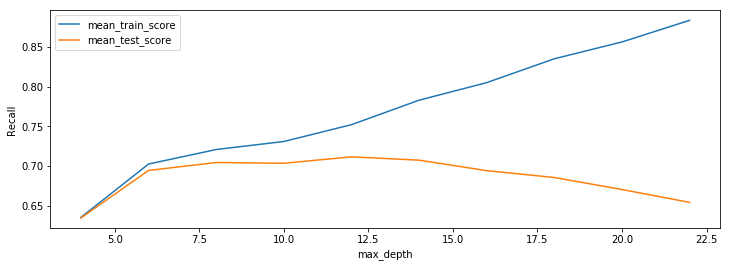

In [25]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(4, 24, 2)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall", n_jobs=-1,return_train_score=True)
rf.fit(X_train, y_train)

# scores of GridSearch CV
scores = rf.cv_results_
df = pd.DataFrame(scores)

# plotting accuracies with max_depth
plt.figure()
plt.plot(df["param_max_depth"], 
         df["mean_train_score"])
plt.plot(df["param_max_depth"], 
         df["mean_test_score"])
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py

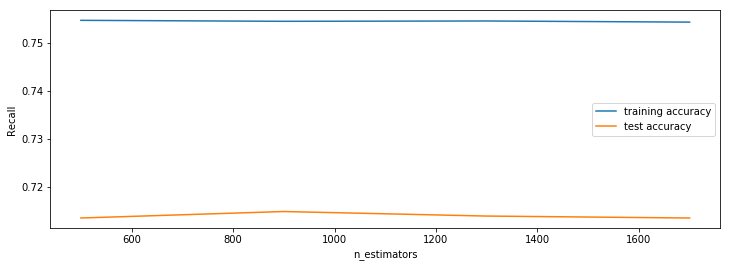

In [26]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(500, 2000, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=12, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall", n_jobs=-1)
rf.fit(X_train, y_train)

# scores of GridSearch CV
scores = rf.cv_results_
df = pd.DataFrame(scores)

# plotting accuracies with n_estimators
plt.figure()
plt.plot(df["param_n_estimators"], 
         df["mean_train_score"], 
         label="training accuracy")
plt.plot(df["param_n_estimators"], 
         df["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [29]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4,6,8,10,12]}

# instantiate the model
rf = RandomForestClassifier(max_depth=12, class_weight='balanced',n_estimators=900)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf.fit(X_train, y_train)

# scores of GridSearch CV
scores = rf.cv_results_
df = pd.DataFrame(scores)

# plotting accuracies with n_estimators
plt.figure()
plt.plot(df["param_max_features"], df["mean_train_score"], label="training accuracy")
plt.plot(df["param_max_features"], df["mean_test_score"],  label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Recall")
plt.legend()
plt.show()

KeyboardInterrupt: 

In [ ]:
# max _feature 10

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py

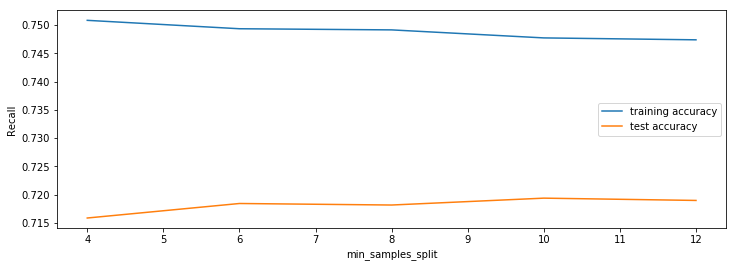

In [31]:
# # GridSearchCV to find optimal max_features
# from sklearn.model_selection import KFold
# from sklearn.model_selection import GridSearchCV


# # specify number of folds for k-fold CV
# n_folds = 5

# # parameters to build the model on
# parameters = {'min_samples_split': range(4, 14, 2)}

# # instantiate the model
# rf = RandomForestClassifier(max_depth=12, class_weight='balanced',n_estimators=900, max_features = 6)


# # fit tree on training data
# rf = GridSearchCV(rf, parameters, 
#                     cv=n_folds, 
#                    scoring="recall")
# rf.fit(X_train, y_train)

# # scores of GridSearch CV
# scores = rf.cv_results_
# df = pd.DataFrame(scores)

# # plotting accuracies with n_estimators
# plt.figure()
# plt.plot(df["param_min_samples_split"], 
#          df["mean_train_score"], 
#          label="training accuracy")
# plt.plot(df["param_min_samples_split"], 
#          df["mean_test_score"], 
#          label="test accuracy")
# plt.xlabel("min_samples_split")
# plt.ylabel("Recall")
# plt.legend()
# plt.show()

In [27]:
rf= RandomForestClassifier(max_depth=12, class_weight='balanced', n_estimators=900, max_features = 6, min_samples_split =10, random_state=9, min_samples_leaf = 5)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=12, max_features=6,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=900, n_jobs=None, oob_score=False, random_state=9,
            verbose=0, warm_start=False)

In [28]:
print(X_train.shape)
print(y_train.shape)
y_pred = rf.predict(X_train)


# Evaluation train
print(y_pred.shape)
print(classification_report(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))
print('Score: ', rf.score(X_train, y_train))

(26216, 80)
(26216,)
(26216,)
              precision    recall  f1-score   support

           0       0.90      0.89      0.89     18818
           1       0.73      0.74      0.73      7398

   micro avg       0.85      0.85      0.85     26216
   macro avg       0.81      0.81      0.81     26216
weighted avg       0.85      0.85      0.85     26216

[[16751  2067]
 [ 1937  5461]]
Score:  0.847268843454379


In [29]:
# Evaluation validate

y_pred = rf.predict(X_test)
print(y_pred.shape)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

(11236,)
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      8044
           1       0.71      0.72      0.72      3192

   micro avg       0.84      0.84      0.84     11236
   macro avg       0.80      0.80      0.80     11236
weighted avg       0.84      0.84      0.84     11236

[[7103  941]
 [ 889 2303]]


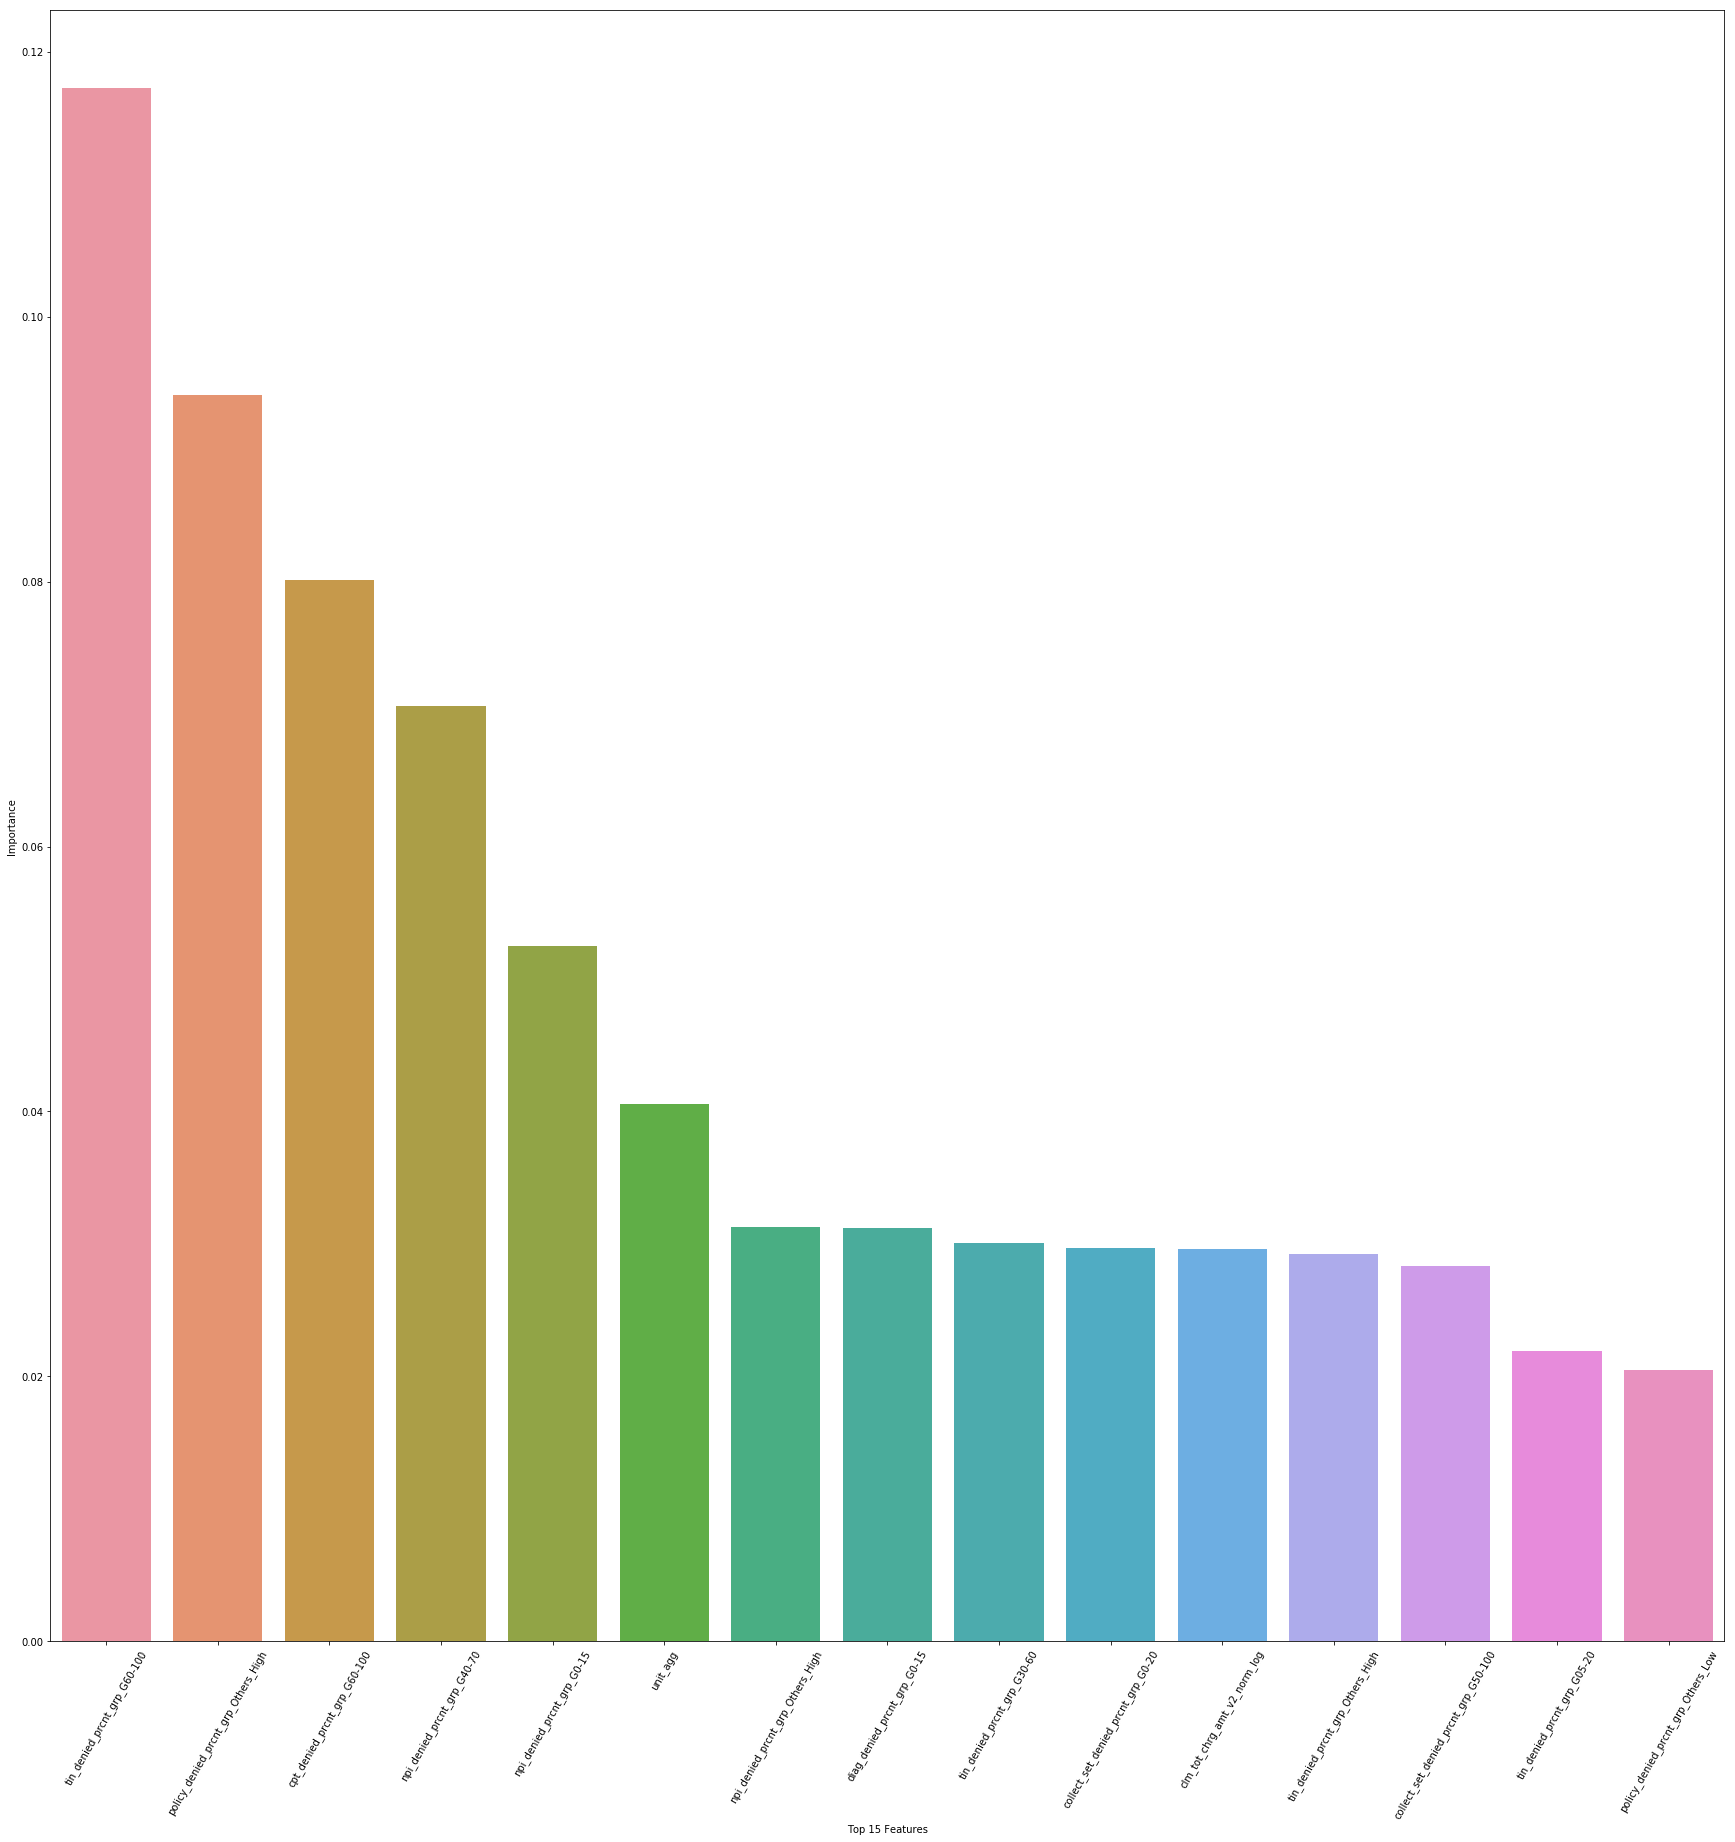

In [35]:
imp=rf.feature_importances_
names=X_train.columns.values
imp,names=zip(*sorted(zip(imp,names)))

df_1=pd.DataFrame({"Variable":names,"importance":imp})
df_2 = df_1.sort_values(by="importance",axis=0,ascending=False)
df_2 = df_2.reset_index(drop=True)


plt.figure(figsize=(30, 30))

ax = sns.barplot(x='Variable', y= 'importance', data=df_2[0:15])
ax.set(xlabel = 'Top 15 Features', ylabel = 'Importance')
plt.xticks(rotation=60)
plt.show()

In [34]:
# max_depth=10, class_weight='balanced', n_estimators=900, max_features = 12, min_samples_split =10, random_state=9, min_samples_leaf = 5
# rf= RandomForestClassifier(max_depth=12, class_weight='balanced', n_estimators=900, max_features = 6, min_samples_split =10, random_state=9, min_samples_leaf = 5)
#grid Search
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,12,14],
    'n_estimators': [700,800,900,1000,1100], 
    'max_features': [4,6,8,10,12],
    'criterion': ['gini','entropy'],
    'oob_score': [True, False]}

# Create a based model
rf = RandomForestClassifier(class_weight='balanced', min_samples_split= 10, min_samples_leaf = 5)

# Instantiate the grid search model
clf = GridSearchCV(estimator = rf, param_grid = param_grid ,scoring='recall',
                          cv = 5, verbose = 1, n_jobs=-1, refit = True)

clf.fit(X_train,y_train)
print('We can get accuracy of',clf.best_score_,'using',clf.best_params_)
# We can get accuracy of 0.6803188306618462 using {'n_estimators': 800, 'max_features': 10, 'max_depth': 12} first

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 1122 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 16.7min finished


We can get accuracy of 0.7293857823219759 using {'criterion': 'gini', 'max_depth': 14, 'max_features': 10, 'n_estimators': 900, 'oob_score': False}


In [35]:
rf= RandomForestClassifier(n_estimators = 900, max_features = 10, class_weight='balanced', 
                           max_depth = 14, random_state=9, oob_score= False, min_samples_split= 10, min_samples_leaf = 5)
rf.fit(X_train,y_train)

print(X_train.shape)
print(y_train.shape)
y_pred = rf.predict(X_train)

# Evaluation train
print(y_pred.shape)
print(classification_report(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))
print('Score: ', rf.score(X_train, y_train))

# Evaluation validate

y_pred = rf.predict(X_test)
print(y_pred.shape)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

(26216, 92)
(26216,)
(26216,)
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     18818
           1       0.74      0.76      0.75      7398

   micro avg       0.86      0.86      0.86     26216
   macro avg       0.82      0.83      0.83     26216
weighted avg       0.86      0.86      0.86     26216

[[16880  1938]
 [ 1776  5622]]
Score:  0.8583307903570339
(11236,)
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      8044
           1       0.72      0.73      0.72      3192

   micro avg       0.84      0.84      0.84     11236
   macro avg       0.80      0.81      0.81     11236
weighted avg       0.84      0.84      0.84     11236

[[7131  913]
 [ 868 2324]]


0.8072847147705164

In [36]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 50)       
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking
col = X_train.columns[rfe.support_]
col

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[False  True  True False  True  True  True  True False False False False
 False False False False False False False False  True False False False
 False  True  True False  True  True False  True  True False  True  True
  True False  True  True  True  True  True  True False False  True  True
  True False  True  True  True  True  True False  True  True  True  True
  True False False  True  True  True  True False  True  True  True  True
  True  True  True  True  True False  True  True False False False False
 False False False False False False False False]
[41  1  1 43  1  1  1  1 13 30 38 19 18  3 23 22 14 15 17 10  1  2  9  8
 34  1  1  7  1  1 39  1  1 40  1  1  1 33  1  1  1  1  1  1  6  4  1  1
  1  5  1  1  1  1  1 42  1  1  1  1  1 35 36  1  1  1  1 32  1  1  1  1
  1  1  1  1  1 11  1  1 20 37 31 27 26 12 29 28 21 24 25 16]


Index(['listed_presence', 'clm_tot_chrg_amt_v2_norm_log',
       'mem_age_bin_(0.0, 20.0]', 'mem_age_bin_(20.0, 45.0]',
       'mem_age_bin_(45.0, 60.0]', 'mem_age_bin_(60.0, 146.0]',
       'pos_denied_prcnt_grp_G0-15', 'pos_denied_prcnt_grp_Others_Low',
       'lob_denied_prcnt_grp_G0-20', 'lob_denied_prcnt_grp_G30-50',
       'lob_denied_prcnt_grp_G50-100', 'collect_set_denied_prcnt_grp_G20-30',
       'collect_set_denied_prcnt_grp_G30-50', 'cpt_denied_prcnt_grp_G0-05',
       'cpt_denied_prcnt_grp_G05-10', 'cpt_denied_prcnt_grp_G10-20',
       'cpt_denied_prcnt_grp_G40-60', 'cpt_denied_prcnt_grp_G60-100',
       'cpt_denied_prcnt_grp_Others_High', 'cpt_denied_prcnt_grp_Others_Low',
       'tin_denied_prcnt_grp_G0', 'tin_denied_prcnt_grp_G0-05',
       'tin_denied_prcnt_grp_G30-60', 'tin_denied_prcnt_grp_G60-100',
       'tin_denied_prcnt_grp_Others_High', 'state_denied_prcnt_grp_G0-15',
       'state_denied_prcnt_grp_G15-25', 'state_denied_prcnt_grp_G25-30',
       'state_denied_pr

In [ ]:
train_rollup=train_input_dummy.groupby(['icn', 'clm_den_flag'],as_index=False).sum()

In [ ]:
#feature_imp=pd.read_csv("/mapr/projects/MCR_Threshold/Data/dummy_imp_dev.csv")
# name = df_2[df_2["cum_per"]<=80]["Variable"]

#name=np.append(name, ['mcr_denial_flag'])
# name=np.append(col, ['clm_den_flag'])

# train_rollup=train_input_dummy.groupby(['icn', 'clm_den_flag'],as_index=False).sum()

# train_rollup=train_rollup[name]
X=train_rollup.drop('clm_den_flag',axis=1).values
X.shape
y=train_rollup['clm_den_flag'].values
y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=9)

In [ ]:
train_rollup.shape

In [ ]:
rf= RandomForestClassifier(n_estimators = 1400, max_features = 8, class_weight='balanced', max_depth = 12, random_state=9, oob_score= True, min_samples_split= 6, min_samples_leaf = 3)
rf.fit(X_train,y_train)

In [ ]:
print(X_train.shape)
print(y_train.shape)
y_pred = rf.predict(X_train)


# Evaluation train
print(y_pred.shape)
print(classification_report(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))
print('Score: ', rf.score(X_train, y_train))

In [ ]:
# Evaluation validate

y_pred = rf.predict(X_test)
print(y_pred.shape)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

In [ ]:
## Lift Decile analysis

y_pred_prob_1 = rf.predict_proba(X_test)[:,1]

data_n=pd.DataFrame({"actual":y_test,"pred":y_pred_prob_1})
# data_lift_analysis=data_n.copy()
#data_lift_analysis.to_csv("/mapr/projects/MCR_Threshold/Data/lift_all_inscope_decide1.csv",index=False)


In [ ]:
## Applying threshold In sample Validation


threshold=0.3

c=[]

for i in data_n['pred']:
    
    if i > threshold:
        d=[1]
        c.extend(d)
      
    else:
        d=[0]
        c.extend(d)
        
data_n['pred1']=c


# Print confusion Matrix
from sklearn.metrics import confusion_matrix
print (confusion_matrix(data_n['actual'], data_n['pred1']))
print(classification_report(data_n['actual'], data_n['pred1']))


In [ ]:
#old with 71 and 69
# rf= RandomForestClassifier(n_estimators = 1400, max_features = 8, class_weight='balanced', max_depth = 12, random_state=9, oob_score= True, min_samples_split= 6, min_samples_leaf = 3)

# new with 69 and 68
rf= RandomForestClassifier(max_depth=10, class_weight='balanced', n_estimators=900, max_features = 12, min_samples_split =12, random_state=9, min_samples_leaf = 6)

In [ ]:
#Random grid
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10,12],
    'n_estimators': [700,800,900,1000,1100], 
    'max_features': [8,10,12,14,16],
    'criterion': ['gini','entropy']}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced', min_samples_split= 12, min_samples_leaf = 6)
# Instantiate the grid search model
clf = GridSearchCV(estimator = rf, param_grid = param_grid ,scoring='recall',
                          cv = 5, verbose = 1, n_jobs=-1, refit = True)

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
print('We can get accuracy of',clf.best_score_,'using',clf.best_params_)

# We can get accuracy of 0.6803188306618462 using {'n_estimators': 800, 'max_features': 10, 'max_depth': 12} first



In [ ]:
rf= RandomForestClassifier(n_estimators = 700, max_features = 16, class_weight='balanced', max_depth = 12, random_state=9, oob_score= True, min_samples_split= 12, min_samples_leaf = 6)
rf.fit(X_train,y_train)

In [ ]:
print(X_train.shape)
print(y_train.shape)
y_pred = rf.predict(X_train)


# Evaluation train
print(y_pred.shape)
print(classification_report(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))
print('Score: ', rf.score(X_train, y_train))

In [ ]:
# Evaluation validate

y_pred = rf.predict(X_test)
print(y_pred.shape)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

In [ ]:
train_rollup
test_rollup

In [198]:
import h2o

In [199]:
#h2o.shutdown(prompt=False)
h2o.init(nthreads = -1, max_mem_size = 13)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_191"; OpenJDK Runtime Environment (build 1.8.0_191-8u191-b12-2ubuntu0.16.04.1-b12); OpenJDK 64-Bit Server VM (build 25.191-b12, mixed mode)
  Starting server from /opt/conda/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpdpys5cjs
  JVM stdout: /tmp/tmpdpys5cjs/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpdpys5cjs/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.2
H2O cluster version age:,4 months and 2 days !!!
H2O cluster name:,H2O_from_python_unknownUser_licfa2
H2O cluster total nodes:,1
H2O cluster free memory:,11.56 Gb
H2O cluster total cores:,64
H2O cluster allowed cores:,64
H2O cluster status:,"accepting new members, healthy"


In [ ]:
subst=[]
train_rollup1=train_rollup[subset]
test_rollup1=test_rollup[subset]

In [200]:
train_hex=h2o.H2OFrame(train_rollup)
test_hex=h2o.H2OFrame(test_rollup)


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [201]:
train_hex['clm_den_flag']=train_hex['clm_den_flag'].asfactor()
test_hex['clm_den_flag']=test_hex['clm_den_flag'].asfactor()

In [202]:
# Setting a seed will guarantee reproducibility

splits = train_hex.split_frame(ratios=[0.7], seed=1)  

train = splits[0]
valid = splits[1]

In [203]:
y = 'clm_den_flag'
x = list(train.columns)

In [204]:
# Import H2O RF:
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [205]:
rf_fit2 = H2ORandomForestEstimator(model_id='rf_fit2', ntrees=200,balance_classes=True, seed=1)
rf_fit2.train(x=x, y=y, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [206]:
rf_perf2 = rf_fit2.model_performance(valid)
print(rf_perf2)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.13016386847960307
RMSE: 0.3607823006739702
LogLoss: 0.41161192213290415
Mean Per-Class Error: 0.21136421804784877
AUC: 0.8631906431622982
pr_auc: 0.7396624144278136
Gini: 0.7263812863245964
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2259896297581175: 


,0,1,Error,Rate
0,6768.0,1174.0,0.1478,(1174.0/7942.0)
1,888.0,2294.0,0.2791,(888.0/3182.0)
Total,7656.0,3468.0,0.1854,(2062.0/11124.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2259896,0.6899248,245.0
max f2,0.1195683,0.7601931,308.0
max f0point5,0.4790757,0.7157876,157.0
max accuracy,0.3426445,0.8286588,200.0
max precision,0.9860516,0.9886364,3.0
max recall,0.0003198,1.0,399.0
max specificity,0.9989110,0.9998741,0.0
max absolute_mcc,0.2964025,0.5635105,216.0
max min_per_class_accuracy,0.1773573,0.7831552,271.0
max mean_per_class_accuracy,0.2008331,0.7886358,258.0


Gains/Lift Table: Avg response rate: 28.60 %, avg score: 23.86 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100683,0.9799944,3.4334875,3.4334875,0.9821429,0.9911372,0.9821429,0.9911372,0.0345695,0.0345695,243.3487474,243.3487474
,2,0.0200467,0.9431405,3.2124620,3.3234703,0.9189189,0.9614565,0.9506726,0.9763634,0.0320553,0.0666248,221.2461991,232.3470305
,3,0.0300252,0.9123608,3.3069462,3.3179788,0.9459459,0.9272703,0.9491018,0.9600480,0.0329981,0.0996229,230.6946167,231.7978750
,4,0.0400036,0.8784967,3.1179778,3.2680909,0.8918919,0.8941748,0.9348315,0.9436167,0.0311125,0.1307354,211.7977814,226.8090876
,5,0.0500719,0.8465049,3.0901387,3.2323088,0.8839286,0.8620845,0.9245961,0.9272225,0.0311125,0.1618479,209.0138727,223.2308757
,6,0.1000539,0.7064992,2.9300291,3.0813047,0.8381295,0.7733867,0.8814016,0.8503737,0.1464488,0.3082967,193.0029075,208.1304711
,7,0.1500360,0.5676798,2.4898960,2.8842866,0.7122302,0.6401571,0.8250449,0.7803435,0.1244500,0.4327467,148.9895953,188.4286575
,8,0.2000180,0.4379139,2.1692275,2.7056022,0.6205036,0.5021313,0.7739326,0.7108217,0.1084224,0.5411691,116.9227534,170.5602158
,9,0.2999820,0.2343501,1.6190611,2.3435304,0.4631295,0.3156897,0.6703626,0.5791505,0.1618479,0.7030170,61.9061131,134.3530350
,10,0.4000360,0.1664695,0.9485770,1.9946353,0.2713387,0.1962845,0.5705618,0.4833910,0.0949089,0.7979258,-5.1423015,99.4635273


In [209]:
# varimp_rf=rf_fit2.varimp(True)
# varimp_rf.to_csv("/projects/G12/pickle_data/varimp_rf.csv",index=False)


In [208]:
varimp_rf

,variable,relative_importance,scaled_importance,percentage
0,tin_denied_prcnt_grp_G60-100,53013.746094,1.000000,0.056414
1,bil_diff_fst_norm_log,47340.835938,0.892992,0.050377
2,diag_amnt_avg,43088.406250,0.812778,0.045852
3,icn,39892.019531,0.752484,0.042451
4,cpt_denied_prcnt_grp_G60-100,39664.433594,0.748191,0.042209
5,npi_denied_prcnt_grp_G40-70,36448.957031,0.687538,0.038787
6,npi_denied_prcnt_grp_G0-15,35743.472656,0.674230,0.038036
7,unit_agg_norm_log,29832.748047,0.562736,0.031746
8,npi_diag_amnt_avg,27693.304688,0.522380,0.029470
9,tin_diag_amnt_avg,27328.062500,0.515490,0.029081


In [213]:
y = 'clm_den_flag'
x1 = ['tin_denied_prcnt_grp_G60-100','bil_diff_fst_norm_log','diag_amnt_avg','icn','cpt_denied_prcnt_grp_G60-100','npi_denied_prcnt_grp_G40-70','npi_denied_prcnt_grp_G0-15','unit_agg_norm_log','npi_diag_amnt_avg','tin_diag_amnt_avg','clm_tot_chrg_amt_v2_norm_log','diag_denied_prcnt_grp_G0-15','collect_set_denied_prcnt_grp_G0-20','collect_set_denied_prcnt_grp_G50-100','tin_denied_prcnt_grp_G30-60','cpt_denied_prcnt_grp_G20-40','tin_denied_prcnt_grp_G05-20','npi_denied_prcnt_grp_G0','cpt_denied_prcnt_grp_G40-60','diag_denied_prcnt_grp_G75-100','cpt_denied_prcnt_grp_G05-10','lob_denied_prcnt_grp_G30-50','npi_denied_prcnt_grp_G15-40','lob_denied_prcnt_grp_G20-30','cpt_denied_prcnt_grp_Others','policy_denied_prcnt_grp_G30-50','mem_age_bin_(45.0, 60.0]','diag_denied_prcnt_grp_G30-55','mem_age_bin_(20.0, 45.0]','diag_denied_prcnt_grp_G55-75','policy_denied_prcnt_grp_Others','npi_denied_prcnt_grp_G90-100','cpt_denied_prcnt_grp_G10-20','bil_recv_month_3','plc_of_srvc_bin_others','npi_denied_prcnt_grp_G70-90','state_denied_prcnt_grp_G0-15','bil_recv_month_2','policy_denied_prcnt_grp_G0-20','diag_amnt_avg_ind_above','tin_diag_amnt_avg_ind_above','policy_denied_prcnt_grp_G20-30','npi_diag_amnt_avg_ind_above','npi_denied_prcnt_grp_Others','mem_age_bin_(60.0, 146.0]','bil_diff_fst_bin_(-17.0, 90.0]','tin_denied_prcnt_grp_Others','state_denied_prcnt_grp_G30-50','cpt_denied_prcnt_grp_G0-05','st_abbr_cd_bin_others','listed_presence','bil_recv_month_1','diag_denied_prcnt_grp_G15-25','state_denied_prcnt_grp_G25-30','bil_recv_month_5','plc_of_srvc_bin_22','plc_of_srvc_bin_11','bil_recv_month_11','diag_denied_prcnt_grp_Others','bil_recv_month_12','plc_of_srvc_bin_21','bil_recv_month_10','bil_recv_month_6','mem_age_bin_(0.0, 20.0]','bil_recv_month_7']

In [214]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
gbm = H2OGradientBoostingEstimator(balance_classes=True, seed=1,ntrees =1000,stopping_rounds = 5, stopping_tolerance = 1e-4, stopping_metric = "AUC")
gbm.train(x=x1, y=y, training_frame=train,validation_frame=valid)


gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [235]:
gbm_perf = gbm.model_performance(test_hex)
print(gbm_perf)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.1550401605585432
RMSE: 0.393751394357586
LogLoss: 0.492331238666261
Mean Per-Class Error: 0.22364476452912307
AUC: 0.8393082073435791
pr_auc: 0.7436855315875074
Gini: 0.6786164146871583
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.25437779490288176: 


,0,1,Error,Rate
0,4041.0,1106.0,0.2149,(1106.0/5147.0)
1,644.0,2127.0,0.2324,(644.0/2771.0)
Total,4685.0,3233.0,0.221,(1750.0/7918.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2543778,0.7085276,254.0
max f2,0.0768899,0.7808464,339.0
max f0point5,0.5306252,0.7077416,161.0
max accuracy,0.4267500,0.7870674,195.0
max precision,0.9760047,0.9855072,5.0
max recall,0.0006082,1.0,399.0
max specificity,0.9908977,0.9998057,0.0
max absolute_mcc,0.2974775,0.5379851,238.0
max min_per_class_accuracy,0.2428731,0.7754031,259.0
max mean_per_class_accuracy,0.2543778,0.7763552,254.0


Gains/Lift Table: Avg response rate: 35.00 %, avg score: 30.68 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0101036,0.9735862,2.8217340,2.8217340,0.9875,0.9790234,0.9875,0.9790234,0.0285096,0.0285096,182.1734031,182.1734031
,2,0.0200808,0.9655477,2.6766008,2.7496238,0.9367089,0.9694880,0.9622642,0.9742857,0.0267052,0.0552147,167.6600779,174.9623799
,3,0.0300581,0.9489577,2.4595791,2.6533485,0.8607595,0.9581435,0.9285714,0.9689276,0.0245399,0.0797546,145.9579095,165.3348456
,4,0.0400354,0.9203419,2.5680899,2.6321011,0.8987342,0.9363037,0.9211356,0.9607973,0.0256225,0.1053771,156.8089937,163.2101065
,5,0.0502652,0.9002364,2.4694031,2.5989892,0.8641975,0.9091611,0.9095477,0.9502884,0.0252616,0.1306388,146.9403121,159.8989172
,6,0.1002778,0.8569061,2.3234838,2.4615835,0.8131313,0.8773984,0.8614610,0.9139352,0.1162035,0.2468423,132.3483846,146.1583493
,7,0.1500379,0.7807316,2.0161718,2.3138628,0.7055838,0.8251655,0.8097643,0.8844948,0.1003248,0.3471671,101.6171845,131.3862795
,8,0.2000505,0.6587881,2.0132049,2.2386983,0.7045455,0.7232034,0.7834596,0.8441719,0.1006857,0.4478528,101.3204947,123.8698333
,9,0.3002021,0.4423589,1.7476221,2.0748685,0.6116015,0.5438295,0.7261254,0.7439736,0.1750271,0.6228798,74.7622079,107.4868518
,10,0.3999747,0.2673499,1.3491515,1.8938403,0.4721519,0.3512108,0.6627723,0.6459999,0.1346084,0.7574883,34.9151474,89.3840269


In [226]:
from h2o.grid.grid_search import H2OGridSearch

In [227]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
gbm_params2 = {'learn_rate': [i * 0.01 for i in range(1, 11)],
                'max_depth': list(range(2, 20,2)),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                'col_sample_rate': [i * 0.1 for i in range(5, 11)]}

# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 50, 'seed': 1}


In [228]:
gbm_grid2 = H2OGridSearch(model=H2OGradientBoostingEstimator(balance_classes=True),
                          grid_id='gbm_grid',
                          hyper_params=gbm_params2,
                          search_criteria=search_criteria)

In [229]:
gbm_grid2.train(x=x, y=y,
                training_frame=train,
                validation_frame=valid,
                ntrees=700,
                seed=1)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [230]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by='recall', decreasing=True)
gbm_gridperf2

         col_sample_rate learn_rate max_depth         sample_rate  \
0                    0.9        0.1        14                 1.0   
1                    0.5       0.08        16  0.6000000000000001   
2                    0.8       0.06        12  0.7000000000000001   
3                    0.5       0.07        12  0.7000000000000001   
4     0.6000000000000001       0.09        18  0.7000000000000001   
5                    1.0       0.04        12                 0.8   
6                    0.9       0.07        16  0.6000000000000001   
7                    0.9        0.1        18  0.6000000000000001   
8     0.6000000000000001       0.08        12  0.7000000000000001   
9     0.7000000000000001       0.01        12  0.7000000000000001   
10                   0.8       0.06        12                 0.8   
11    0.7000000000000001        0.1        14  0.7000000000000001   
12                   0.8       0.04         6                 1.0   
13                   0.5       0.0

In [231]:
best_gbm2 = gbm_gridperf2.models[0]

In [232]:
best_gbm2_perf2 = best_gbm2.model_performance(test_hex)
best_gbm2_perf2


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.17500071999540193
RMSE: 0.41833087382525563
LogLoss: 0.6704441759805344
Mean Per-Class Error: 0.22973861156134512
AUC: 0.8387157027631585
pr_auc: 0.7230127704249386
Gini: 0.6774314055263171
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.11608699873730782: 


,0,1,Error,Rate
0,4073.0,1074.0,0.2087,(1074.0/5147.0)
1,695.0,2076.0,0.2508,(695.0/2771.0)
Total,4768.0,3150.0,0.2234,(1769.0/7918.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1160870,0.7012329,309.0
max f2,0.0089068,0.7854348,381.0
max f0point5,0.3620474,0.7026477,222.0
max accuracy,0.3620474,0.7856782,222.0
max precision,0.9989959,0.9821429,0.0
max recall,0.0002013,1.0,399.0
max specificity,0.9989959,0.9998057,0.0
max absolute_mcc,0.1710081,0.5299429,286.0
max min_per_class_accuracy,0.0929851,0.7672431,320.0
max mean_per_class_accuracy,0.1160870,0.7702614,309.0


Gains/Lift Table: Avg response rate: 35.00 %, avg score: 27.76 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0101036,0.9983001,2.7502977,2.7502977,0.9625,0.9988602,0.9625,0.9988602,0.0277878,0.0277878,175.0297726,175.0297726
,2,0.0200808,0.9970888,2.6404305,2.6957096,0.9240506,0.9977093,0.9433962,0.9982884,0.0263443,0.0541321,164.0430499,169.5709607
,3,0.0300581,0.9960115,2.3510683,2.5813118,0.8227848,0.9965984,0.9033613,0.9977274,0.0234572,0.0775893,135.1068252,158.1311846
,4,0.0400354,0.9944510,2.5319197,2.5690028,0.8860759,0.9952978,0.8990536,0.9971219,0.0252616,0.1028510,153.1919656,156.9002752
,5,0.0500126,0.9917373,2.4957494,2.5543891,0.8734177,0.9931864,0.8939394,0.9963368,0.0249008,0.1277517,149.5749375,155.4389073
,6,0.1000253,0.9723308,2.3306996,2.4425444,0.8156566,0.9836871,0.8547980,0.9900120,0.1165644,0.2443161,133.0699634,144.2544354
,7,0.1500379,0.9177713,2.1935997,2.3595628,0.7676768,0.9506362,0.8257576,0.9768867,0.1097077,0.3540238,119.3599656,135.9562788
,8,0.2005557,0.7630435,1.9216366,2.2492539,0.6725,0.8462242,0.7871537,0.9439743,0.0970769,0.4511007,92.1636593,124.9253923
,9,0.3000758,0.3601150,1.7188228,2.0733365,0.6015228,0.5624900,0.7255892,0.8174551,0.1710574,0.6221581,71.8822760,107.3336517
,10,0.3999747,0.1129349,1.2860341,1.8766974,0.4500632,0.2121614,0.6567730,0.6662750,0.1284735,0.7506315,28.6034105,87.6697361
